#**<center>$\color{green}{\text{TUGAS 2 : KLASIFIKASI}}$</center>**

> Add blockquote



---


<p>
Universitas Terbuka adalah sebuah perguruan tinggi terbuka yang memberikan kesempatan bagi putra putri bangsa untuk menimba ilmu dan pengetahuan. UT memiliki mahasiswa dengan latar belakang yang beragam. Mahasiswanya tidak terbatas pada lulusan baru dari sma/smu/smk sederajat. Beberapa diantaranya bahkan telah/sedang bekerja. Kondisi tersebut memberikan kesulitan bagi pihak kampus dalam menerapkan strategi untuk membantu mahasiswa berhasil melewati masa kuliah dan lulus tepat waktu.
</p>

<p>
Sebagai seorang Machine Learning engineer, kamu diminta untuk membuat model yang mampu mendeteksi secara dini tigkat resiko kegagalan seorang mahasiswa. Dengan harapan jika sistem mampu memberikan informasi yang valid, maka bagian wali akademik dapat memberikan konseling yang tepat. Untuk melaksanakan tugasmu ini, kamu diberikan data yang bersumber dari dua periode penerimaan.
</p>


# Task 1
Mulailah memuat semua data yang ada ke sistem.

## IMPORT LIBRARY YANG DIPERLUKAN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from scipy.stats import pearsonr, pointbiserialr
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score, auc, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay

#tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

#HYPERPARAMETER TUNING
from bayes_opt import BayesianOptimization
from sklearn.model_selection import GridSearchCV

#WARNINGS
import warnings
warnings.filterwarnings("ignore")

## IMPORT MASING-MASING DATA

In [2]:
# 1) Muat data dari kedua sumber
df1=pd.read_csv('Data Siswa Periode 1.csv')
df2=pd.read_csv('Data Siswa Periode 2.csv')

# 2) Lihat atribut apa saja yang ada dari kedua data tersebut
print(df1.columns)
print(df2.columns)

Index(['ID', 'Status Pernikahan', 'Program Studi', 'Kelas Reguler/Malam',
       'Pendidikan Terakhir', 'Nilai SMA', 'Daerah Asal', 'Pendidikan Ibu',
       'Pendidikan Ayah', 'Pekerjaan Ibu', 'Pekerjaan Ayah',
       'Nilai Ujian Masuk', 'Pindahan', 'Berkebutuhan Khusus',
       'Status pembayaran semester terakhir', 'Jenis Kelamin', 'Beasiswa',
       'Usia saat mendaftar', 'IP Semester 1', 'IP Semester 2', 'Target'],
      dtype='object')
Index(['ID', 'Status Pernikahan', 'Program Studi', 'Kelas Siang/Malam',
       'Pendidikan Terakhir', 'Nilai SMA', 'Daerah Asal', 'Pendidikan Ibu',
       'Pendidikan Ayah', 'Pekerjaan Ibu', 'Pekerjaan Ayah',
       'Nilai Ujian Masuk', 'Pindahan', 'Berkebutuhan Khusus',
       'Status pembayaran semester terakhir', 'Jenis Kelamin', 'Beasiswa',
       'Umur saat mendaftar', 'IP Semester 1', 'IP Semester 2', 'Target'],
      dtype='object')


## MELIHAT INFORMASI DARI SETIAP DATAFRAME 1 & 2

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   1827 non-null   int64  
 1   Status Pernikahan                    1827 non-null   object 
 2   Program Studi                        1827 non-null   object 
 3   Kelas Reguler/Malam                  1824 non-null   object 
 4   Pendidikan Terakhir                  1827 non-null   object 
 5   Nilai SMA                            1827 non-null   float64
 6   Daerah Asal                          1824 non-null   object 
 7   Pendidikan Ibu                       1827 non-null   object 
 8   Pendidikan Ayah                      1827 non-null   object 
 9   Pekerjaan Ibu                        1827 non-null   object 
 10  Pekerjaan Ayah                       1827 non-null   object 
 11  Nilai Ujian Masuk             

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   1730 non-null   int64  
 1   Status Pernikahan                    1730 non-null   object 
 2   Program Studi                        1730 non-null   object 
 3   Kelas Siang/Malam                    1730 non-null   object 
 4   Pendidikan Terakhir                  1730 non-null   object 
 5   Nilai SMA                            1730 non-null   float64
 6   Daerah Asal                          1730 non-null   object 
 7   Pendidikan Ibu                       1730 non-null   object 
 8   Pendidikan Ayah                      1730 non-null   object 
 9   Pekerjaan Ibu                        1730 non-null   object 
 10  Pekerjaan Ayah                       1730 non-null   object 
 11  Nilai Ujian Masuk             

# Task 2
Datanya sudah termuat, fitur nya hampir semuanya sama, tetapi ada yang berbeda sehingga perlu dipetakan

In [5]:
# 1) Identifikasi fitur serupa, lakukan penamaan ulang fitur serupa
cols1 = set(df1.columns)
cols2 = set(df2.columns)

only_in_df1 = sorted(cols1 - cols2)
only_in_df2 = sorted(cols2 - cols1)
common_cols = sorted(cols1 & cols2)

print("Kolom hanya di df1:", only_in_df1)
print("Kolom hanya di df2:", only_in_df2)
print("Jumlah kolom sama:", len(common_cols))

Kolom hanya di df1: ['Kelas Reguler/Malam', 'Usia saat mendaftar']
Kolom hanya di df2: ['Kelas Siang/Malam', 'Umur saat mendaftar']
Jumlah kolom sama: 19


In [6]:
# Melakukan penamaan ulang fitur serupa pada df1 agar sesuai dengan df2
df1.rename(columns={'Kelas Reguler/Malam':'Kelas Siang/Malam', 'Usia saat mendaftar':'Umur saat mendaftar'}, inplace=True)

##Task 3
Butuh penyatuan data, tapi ternyata ada kodefikasi atribut fitur yang berbeda, harus di samakan

In [7]:
# Hitung value counts untuk setiap kolom bertipe object pada df1 dan df2

# Kolom object di df1 dan df2
obj_cols_df1 = df1.select_dtypes(include='object').columns.tolist()
obj_cols_df2 = df2.select_dtypes(include='object').columns.tolist()

# Simpan hasil dalam dictionary agar bisa dipakai lagi
df1_value_counts = {c: df1[c].value_counts(dropna=False) for c in obj_cols_df1}
df2_value_counts = {c: df2[c].value_counts(dropna=False) for c in obj_cols_df2}

# Tampilkan ringkasannya
print("=== Value Counts df1 ===")
for c in obj_cols_df1:
    print(f"\n[df1] {c}")
    print(df1_value_counts[c])

print("\n\n=== Value Counts df2 ===")
for c in obj_cols_df2:
    print(f"\n[df2] {c}")
    print(df2_value_counts[c])

=== Value Counts df1 ===

[df1] Status Pernikahan
Status Pernikahan
Belum Menikah    1583
Menikah           180
Cerai              64
Name: count, dtype: int64

[df1] Program Studi
Program Studi
Perbankan              287
Hubungan Masyarakat    167
Agronomi               147
Teknik Mesin           142
Jurnalistik            125
Akuntansi              117
Ekonomi                113
Perpustakaan           102
Pertanian               93
Pariwisata              93
Manajemen               88
Penyiaran               85
Perpajakan              80
Teknologi Informasi     78
Keperawatan             68
Teknik Industri         42
Name: count, dtype: int64

[df1] Kelas Siang/Malam
Kelas Siang/Malam
Reguler    1619
Malam       205
NaN           3
Name: count, dtype: int64

[df1] Pendidikan Terakhir
Pendidikan Terakhir
SMA/Sederajat       1584
Perguruan Tinggi     243
Name: count, dtype: int64

[df1] Daerah Asal
Daerah Asal
Pulau Jawa    1779
Luar Jawa       45
NaN              3
Name: count, dtype:

In [8]:
# Identifikasi nilai kategori yang hanya ada di df1_value_counts atau df2_value_counts (mengabaikan NaN)
all_cols = sorted(set(df1_value_counts.keys()) | set(df2_value_counts.keys()))

category_diffs = {}
for col in all_cols:
    s1 = df1_value_counts.get(col)
    s2 = df2_value_counts.get(col)

    cats1 = set(s1.index.tolist()) if s1 is not None else set()
    cats2 = set(s2.index.tolist()) if s2 is not None else set()

    # Abaikan NaN
    cats1 = {x for x in cats1 if not pd.isna(x)}
    cats2 = {x for x in cats2 if not pd.isna(x)}

    only_in_df1_vals = sorted(cats1 - cats2)
    only_in_df2_vals = sorted(cats2 - cats1)

    if only_in_df1_vals or only_in_df2_vals:
        category_diffs[col] = {
            "only_in_df1": only_in_df1_vals,
            "only_in_df2": only_in_df2_vals
        }

# Ringkasan dalam DataFrame
cat_diff_rows = []
for col, diff in category_diffs.items():
    cat_diff_rows.append({
        "column": col,
        "only_in_df1_count": len(diff["only_in_df1"]),
        "only_in_df2_count": len(diff["only_in_df2"]),
        "only_in_df1": diff["only_in_df1"][:10],
        "only_in_df2": diff["only_in_df2"][:10],
    })

category_diffs_df = pd.DataFrame(cat_diff_rows).sort_values(
    by=["only_in_df1_count", "only_in_df2_count"], ascending=False
).reset_index(drop=True)

print("Perbedaan kategori antar dataset (mengabaikan NaN):")
display(category_diffs_df)

Perbedaan kategori antar dataset (mengabaikan NaN):


column  only_in_df1_count  only_in_df2_count     only_in_df1  \
0      Jenis Kelamin                  2                  2  [Pria, Wanita]   
1  Kelas Siang/Malam                  1                  1       [Reguler]   

              only_in_df2  
0  [Laki-laki, Perempuan]  
1                 [Siang]

In [9]:
# 1) Lakukan penyamaan kodefikasi atribut
df2['Jenis Kelamin'] = df1['Jenis Kelamin'].replace({'Laki-laki':'Pria', 'Perempuan':'Wanita'})
df1['Kelas Siang/Malam'] = df1['Kelas Siang/Malam'].replace({'Reguler':'Siang'})

# 2) Lakukan penyatuan data
df=pd.concat([df1, df2], ignore_index=True)

# Task 4
Sekarang kita lakukan analisis atribut untuk setiap fitur nya, mulai dengan penanganan missing/null value

In [11]:
# 1)	Identifikasi dan tangani missing/null value
df.isnull().sum()

ID                                     0
Status Pernikahan                      0
Program Studi                          0
Kelas Siang/Malam                      3
Pendidikan Terakhir                    0
Nilai SMA                              0
Daerah Asal                            3
Pendidikan Ibu                         0
Pendidikan Ayah                        0
Pekerjaan Ibu                          0
Pekerjaan Ayah                         0
Nilai Ujian Masuk                      0
Pindahan                               0
Berkebutuhan Khusus                    0
Status pembayaran semester terakhir    0
Jenis Kelamin                          0
Beasiswa                               0
Umur saat mendaftar                    0
IP Semester 1                          0
IP Semester 2                          0
Target                                 0
dtype: int64

In [12]:
df_cleaned = df.dropna()

In [13]:
df_cleaned.isnull().sum()

ID                                     0
Status Pernikahan                      0
Program Studi                          0
Kelas Siang/Malam                      0
Pendidikan Terakhir                    0
Nilai SMA                              0
Daerah Asal                            0
Pendidikan Ibu                         0
Pendidikan Ayah                        0
Pekerjaan Ibu                          0
Pekerjaan Ayah                         0
Nilai Ujian Masuk                      0
Pindahan                               0
Berkebutuhan Khusus                    0
Status pembayaran semester terakhir    0
Jenis Kelamin                          0
Beasiswa                               0
Umur saat mendaftar                    0
IP Semester 1                          0
IP Semester 2                          0
Target                                 0
dtype: int64

# Task 5
Untuk bisa melihat bentuk dari data, kita perlu menghitung histogram dari setiap fitur. Dari situ kemudian kita bisa lanjutkan dengan penanganan outlier.

## HISTOGRAM FITUR NUMERIK

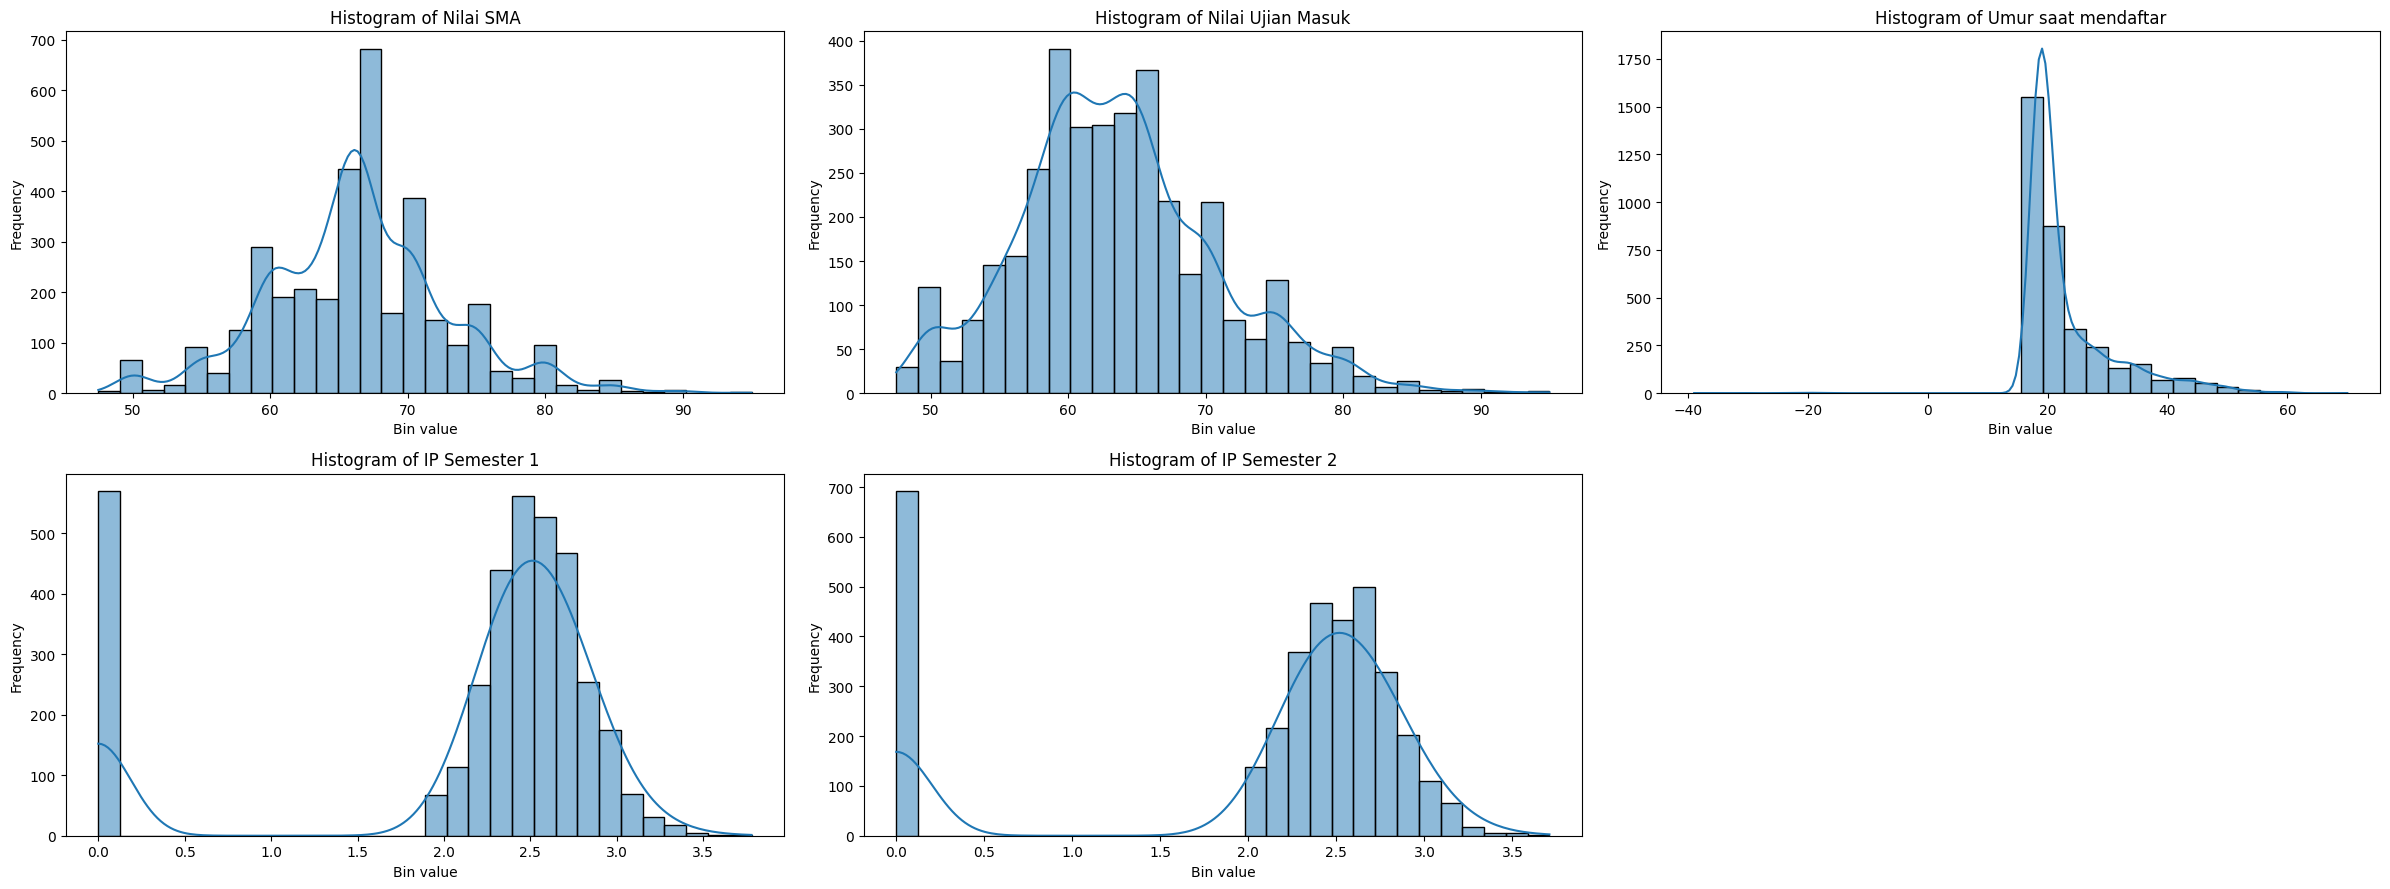

In [27]:
# 1)	Hitung histogram setiap fitur, tampilkan dalam bentuk grafik batang
object_cols = df_cleaned.select_dtypes(include=np.number).drop(columns=['ID'], errors='ignore').columns.tolist()
n_plots = len(object_cols)
grid_cols = 3
grid_rows = (n_plots + grid_cols - 1) // grid_cols
fig2, axs2 = plt.subplots(grid_rows, grid_cols, figsize=(8 * grid_cols, 4.5 * grid_rows))

# Pastikan axs2 berupa array 1D untuk iterasi
axs2 = np.array(axs2).reshape(-1)

for idx, col in enumerate(object_cols):
    ax = axs2[idx]
    s = df_cleaned[col].fillna("NaN")
    order = s.value_counts().index
    sns.histplot(x=s, bins=30, kde=True, ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel('Bin value')
    ax.set_ylabel('Frequency')
    ax.grid(False)

# Sembunyikan axis yang tidak terpakai
for j in range(idx + 1, len(axs2)):
    axs2[j].set_visible(False)

plt.tight_layout()
plt.show()

## BARPLOT FITUR KATEGORIKAL

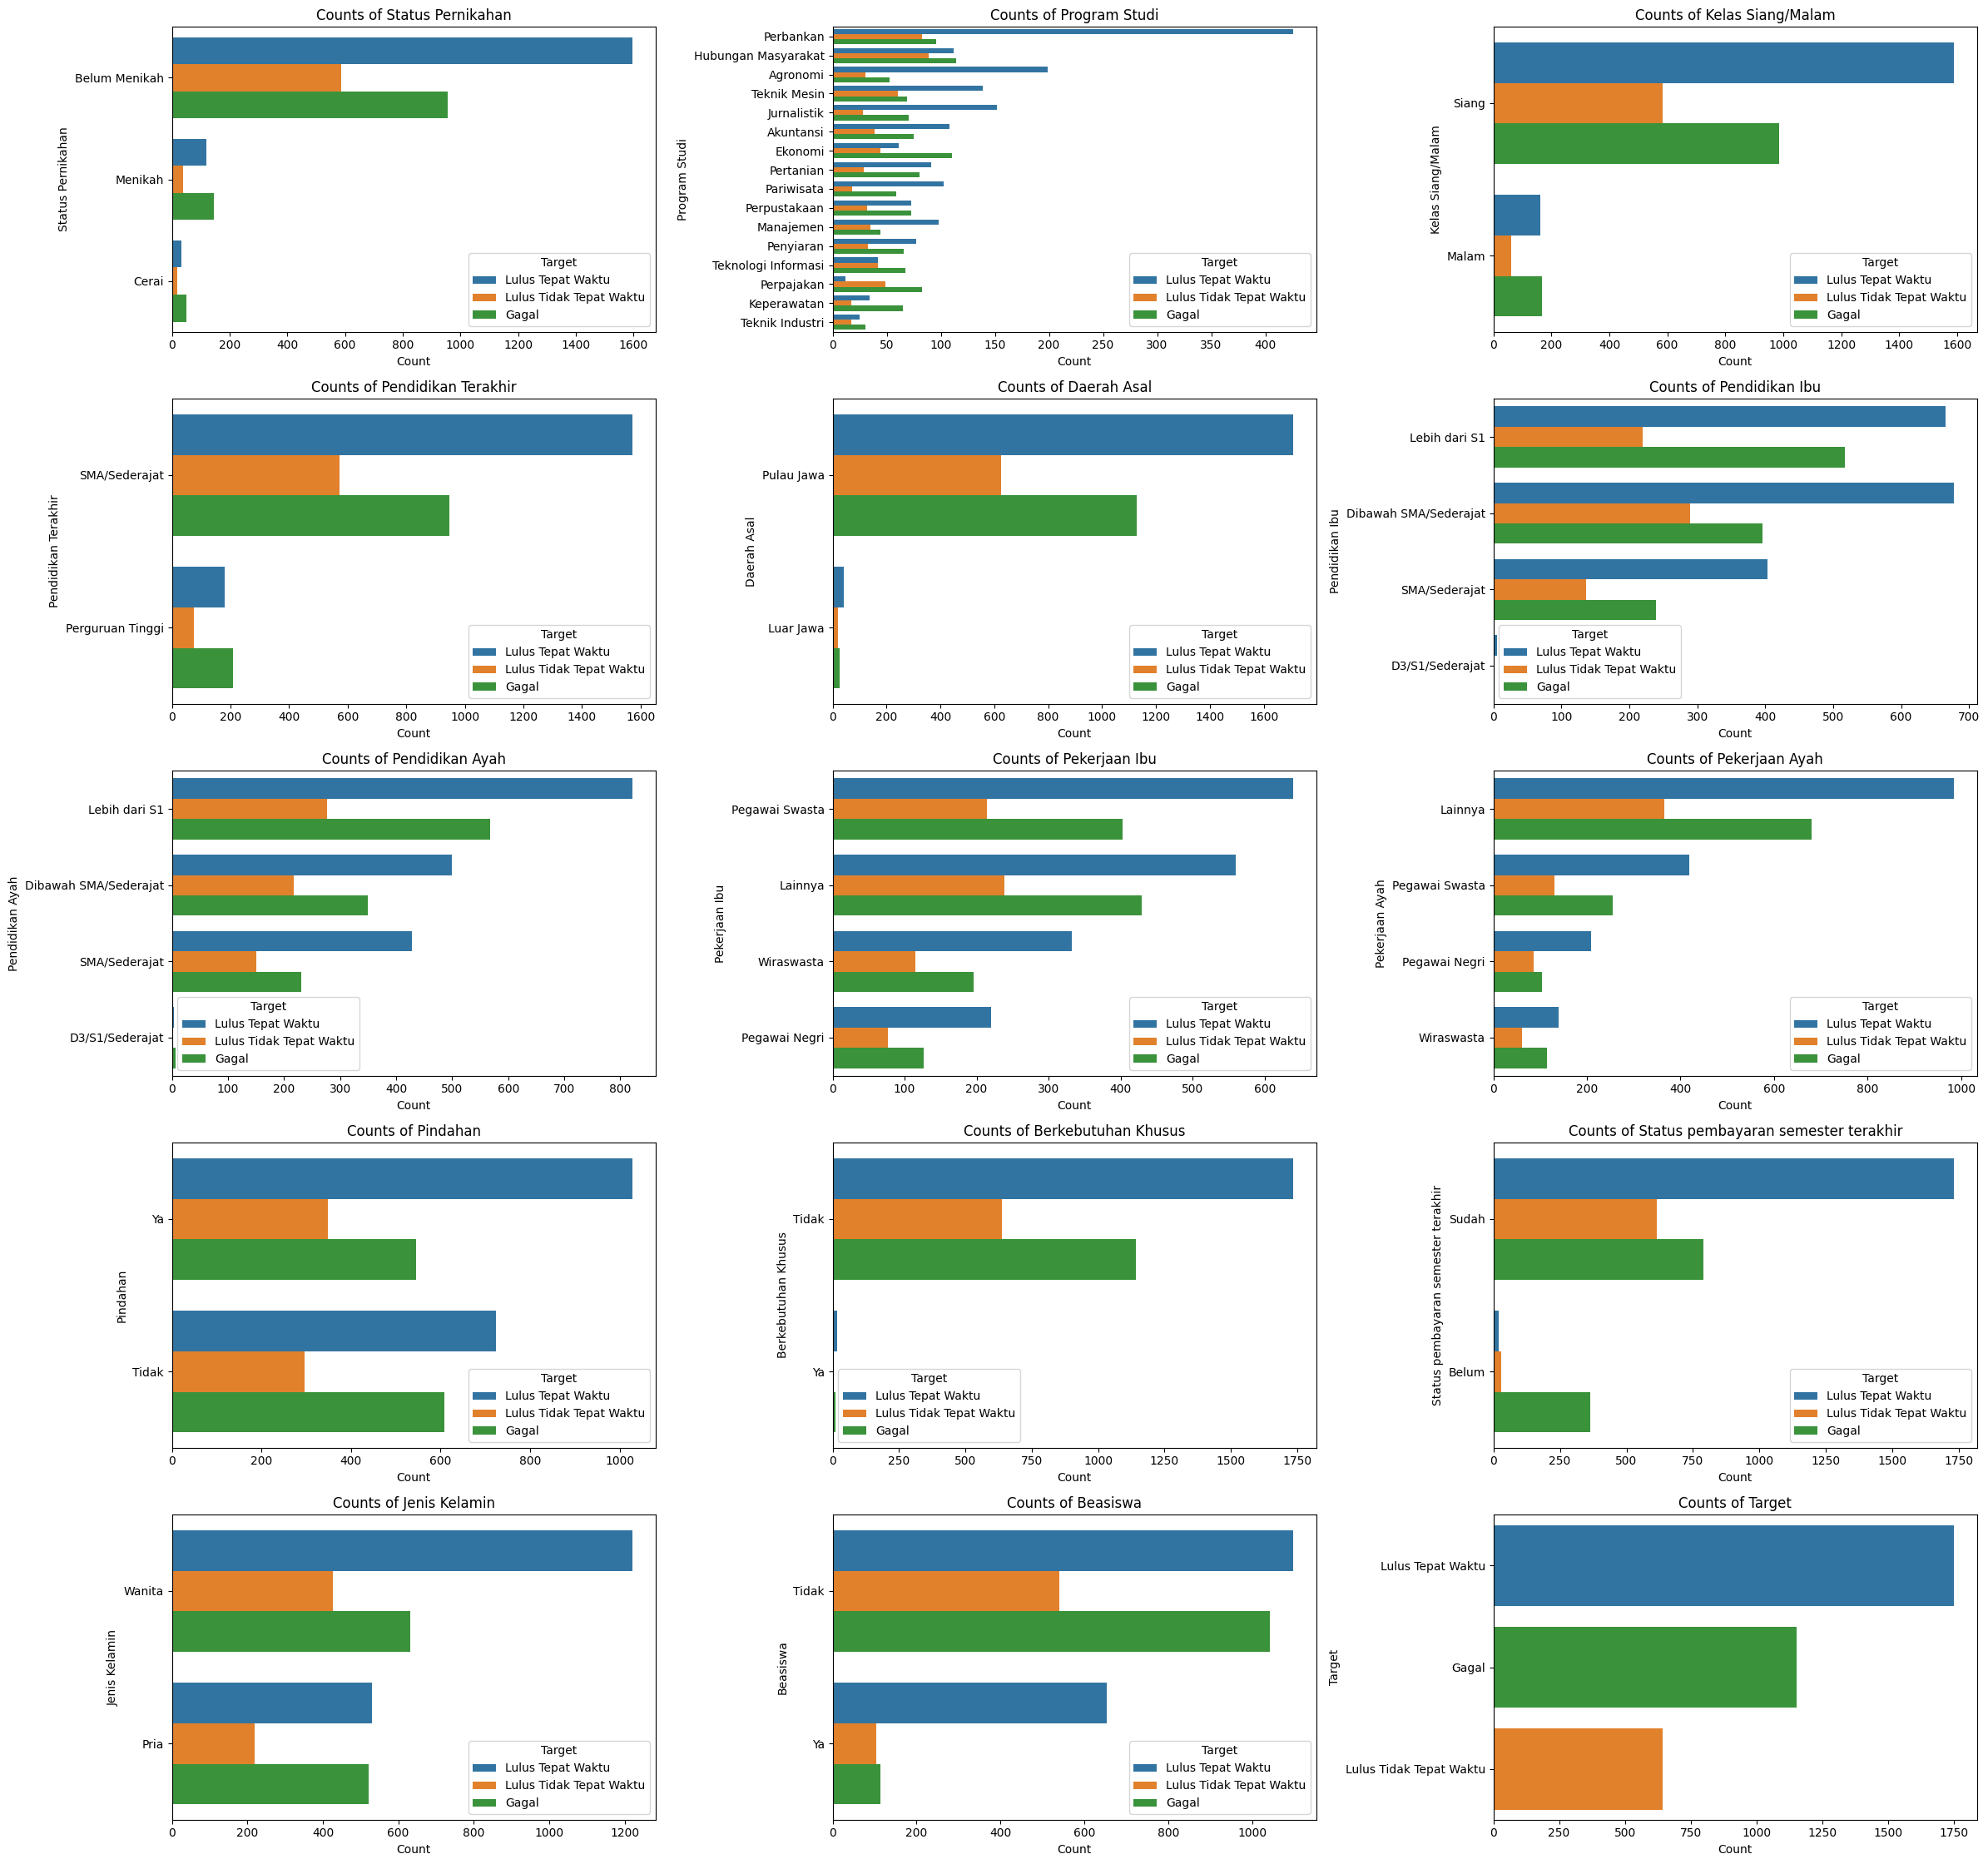

In [81]:
object_cols = df_cleaned.select_dtypes(include='object').columns.tolist()
n_plots = len(object_cols)
grid_cols = 3
grid_rows = (n_plots + grid_cols - 1) // grid_cols
fig2, axs2 = plt.subplots(grid_rows, grid_cols, figsize=(8 * grid_cols, 4.5 * grid_rows))

# Pastikan axs2 berupa array 1D untuk iterasi
axs2 = np.array(axs2).reshape(-1)

for idx, col in enumerate(object_cols):
    ax = axs2[idx]
    s = df_cleaned[col].fillna("NaN")
    order = s.value_counts().index
    sns.countplot(y=s, order=order, hue=df_cleaned['Target'], ax=ax)
    ax.set_title(f'Counts of {col}')
    ax.set_xlabel('Count')
    ax.set_ylabel(col)
    ax.grid(False)

# Sembunyikan axis yang tidak terpakai
for j in range(idx + 1, len(axs2)):
    axs2[j].set_visible(False)

plt.tight_layout()
plt.show()

## DETEKSI OUTLIER FITUR NUMERIK MENGGUNAKAN BOXPLOT

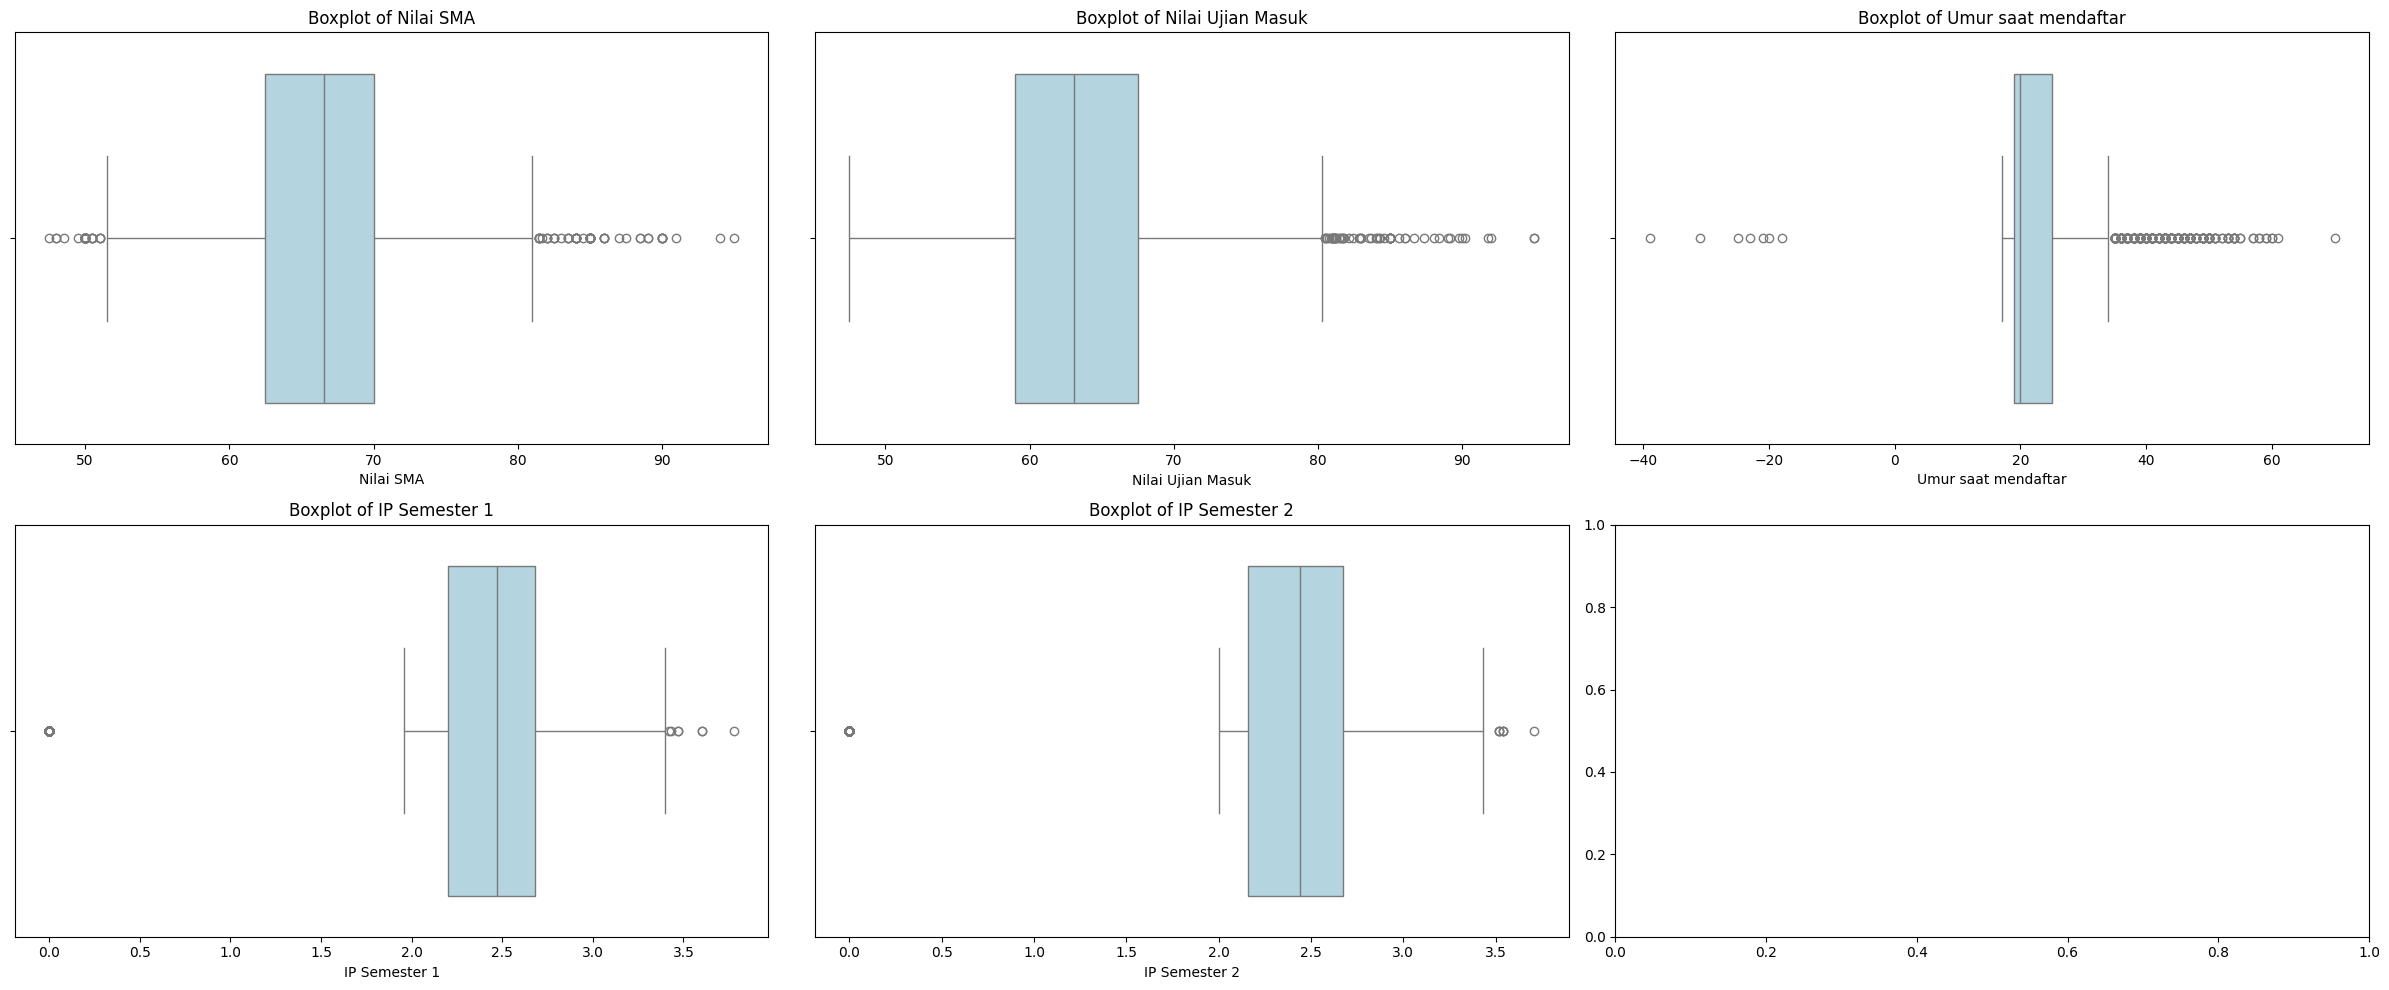

In [35]:
# 2)	Identifikasi outlier dengan boxplot
object_cols = df_cleaned.select_dtypes(include=np.number).drop(columns=['ID'], errors='ignore').columns.tolist()
n_plots = len(object_cols)
grid_cols = 3
grid_rows = (n_plots + grid_cols - 1) // grid_cols
fig2, axs2 = plt.subplots(grid_rows, grid_cols, figsize=(8 * grid_cols, 5 * grid_rows))

for idx, col in enumerate(object_cols):
    ax = axs2[idx // grid_cols, idx % grid_cols]
    sns.boxplot(data=df_cleaned, x=col, ax=ax, color='lightblue')
    ax.set_title(f'Boxplot of {col}')
    ax.grid(False)

# Sembunyikan axis yang tidak terpakai
for j in range(idx + 1, len(axs2)):
    axs2[j].set_visible(False)

plt.tight_layout()
plt.show()

### MENGHAPUS OUTLIER FITUR NUMERIK

In [40]:
# 3)	Hapus outlier dari data
IQR_multiplier = 1.5
df_no_outliers = df_cleaned.copy()

for col in df_no_outliers.select_dtypes(include=np.number).drop(columns=['ID'], errors='ignore').columns:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - IQR_multiplier * IQR
    upper_bound = Q3 + IQR_multiplier * IQR
    outlier=((df_no_outliers[col] < lower_bound) | (df_no_outliers[col] > upper_bound)).sum()
    print('Fitur {}: Lower Bound = {}, Upper Bound = {}, Outlier Count = {}'.format(col, lower_bound, upper_bound, outlier))
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

Fitur Nilai SMA: Lower Bound = 51.25, Upper Bound = 81.25, Outlier Count = 133
Fitur Nilai Ujian Masuk: Lower Bound = 46.550000000000004, Upper Bound = 79.75, Outlier Count = 74
Fitur Umur saat mendaftar: Lower Bound = 11.5, Upper Bound = 31.5, Outlier Count = 431
Fitur IP Semester 1: Lower Bound = 1.5800000000000003, Upper Bound = 3.34, Outlier Count = 418
Fitur IP Semester 2: Lower Bound = 1.7349999999999997, Upper Bound = 3.295, Outlier Count = 117


#### CEK KEMBALI BOXPLOT UNTUK MEMASTIKAN DATA SUDAH MENJADI LEBIH BAIK

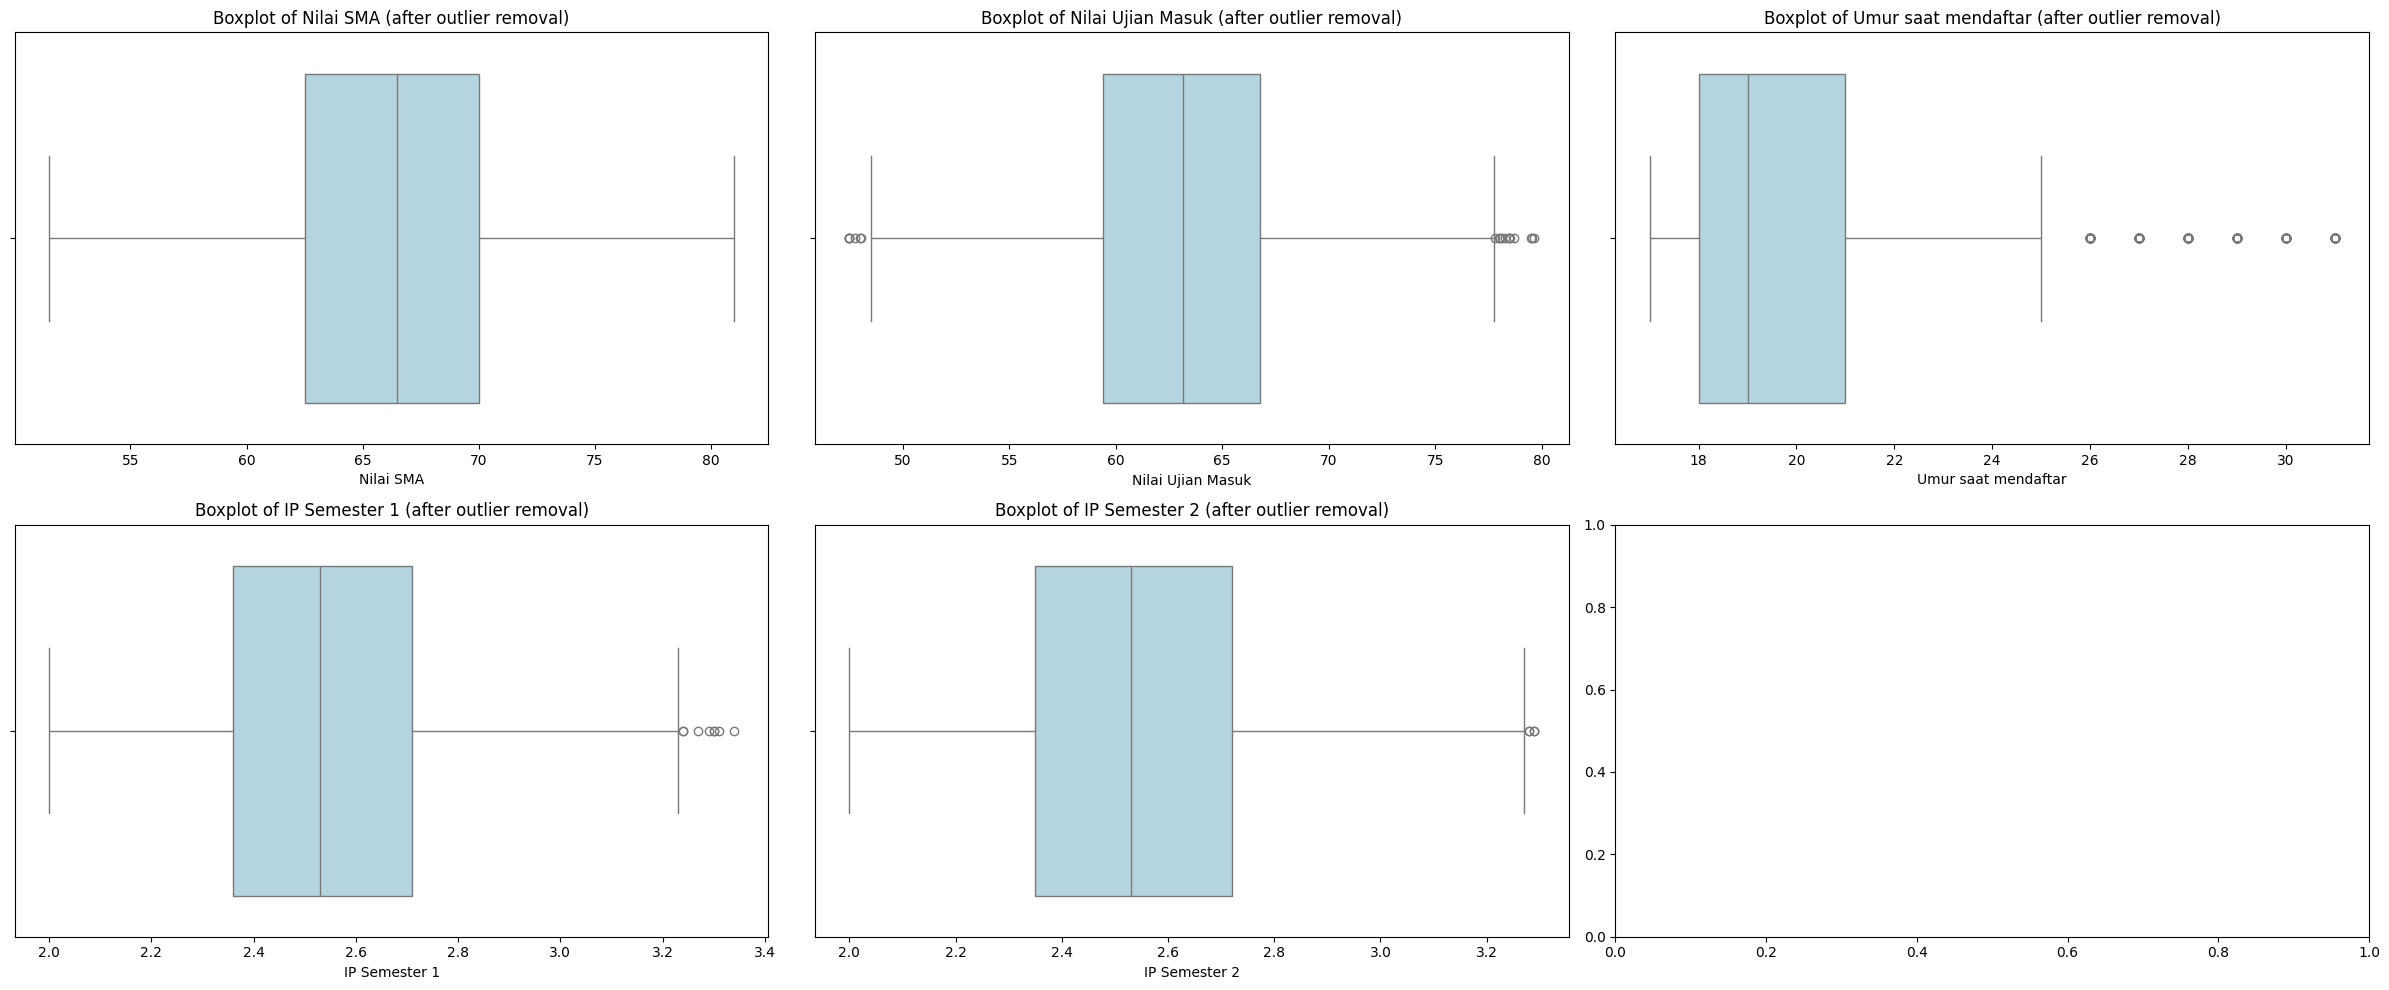

In [47]:
# 2) Cek Ulang boxplot setelah penghapusan outlier
object_cols = df_no_outliers.select_dtypes(include=np.number).drop(columns=['ID'], errors='ignore').columns.tolist()
n_plots = len(object_cols)
grid_cols = 3
grid_rows = (n_plots + grid_cols - 1) // grid_cols
fig2, axs2 = plt.subplots(grid_rows, grid_cols, figsize=(8 * grid_cols, 5 * grid_rows))

for idx, col in enumerate(object_cols):
    ax = axs2[idx // grid_cols, idx % grid_cols]
    sns.boxplot(data=df_no_outliers, x=col, ax=ax, color='lightblue')
    ax.set_title(f'Boxplot of {col} (after outlier removal)')
    ax.grid(False)

# Sembunyikan axis yang tidak terpakai
for j in range(idx + 1, len(axs2)):
    axs2[j].set_visible(False)

plt.tight_layout()
plt.show()

#### CEK KEMBALI HISTOGRAM UNTUK MEMASTIKAN DISTRIBUSI DATA MENJADI LEBIH BAIK

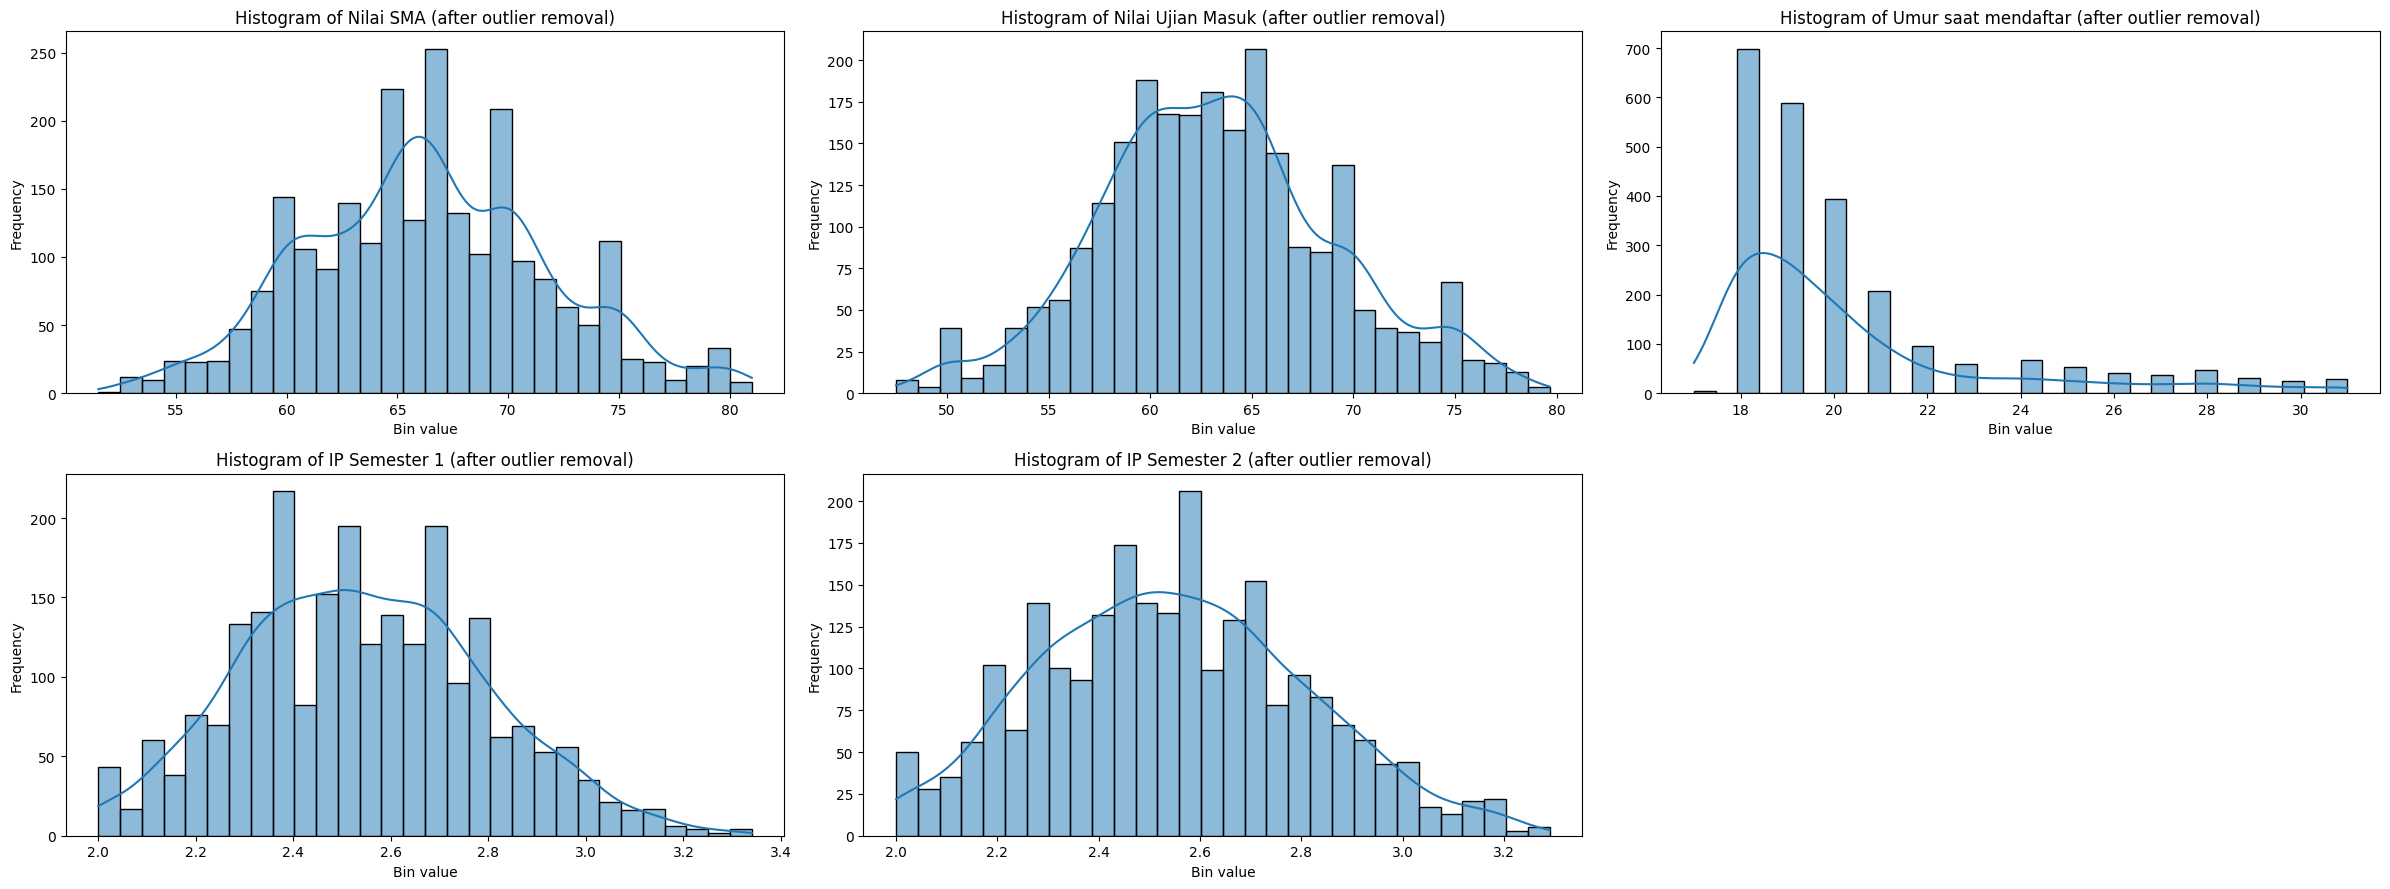

In [48]:
# 1) Cek histogram setiap fitur setelah penghapusan outlier
object_cols = df_no_outliers.select_dtypes(include=np.number).drop(columns=['ID'], errors='ignore').columns.tolist()
n_plots = len(object_cols)
grid_cols = 3
grid_rows = (n_plots + grid_cols - 1) // grid_cols
fig2, axs2 = plt.subplots(grid_rows, grid_cols, figsize=(8 * grid_cols, 4.5 * grid_rows))

# Pastikan axs2 berupa array 1D untuk iterasi
axs2 = np.array(axs2).reshape(-1)

for idx, col in enumerate(object_cols):
    ax = axs2[idx]
    s = df_no_outliers[col].fillna("NaN")
    order = s.value_counts().index
    sns.histplot(x=s, bins=30, kde=True, ax=ax)
    ax.set_title(f'Histogram of {col} (after outlier removal)')
    ax.set_xlabel('Bin value')
    ax.set_ylabel('Frequency')
    ax.grid(False)

# Sembunyikan axis yang tidak terpakai
for j in range(idx + 1, len(axs2)):
    axs2[j].set_visible(False)

plt.tight_layout()
plt.show()

# Task 6
Agar nantinya kita bisa mendapatkan fitur yang relevan, sebaiknya kita melihat hubungan setiap fitur dengan kelas target.

## Analisis Bivariat Fitur Kategorikal dengan Target


### Uji Chi-Square (χ² Test)
Mengukur apakah ada hubungan signifikan antara dua variabel kategorik.

Jika p-value < 0.05 maka hubungan signifikan dan variabel layak dipakai dalam model.

In [ ]:
#1)	Lakukan analisis bivariate

object_cols = df_no_outliers.select_dtypes(include='object').drop(columns=['Target']).columns.tolist()

for i in range(len(object_cols)):
    col = object_cols[i]
    ct = pd.crosstab(df_no_outliers[col], df_no_outliers['Target'])
    print(f"\n=== Tabel Kontingensi untuk {col} ===")
    print(ct)
    
    ct_pct = pd.crosstab(df_no_outliers[col], df_no_outliers['Target'], normalize='index') * 100
    print(f"\n=== Tabel Persentase per Baris (%) untuk {col} ===")
    print(ct_pct.round(2))
    
    chi2, p, dof, expected = chi2_contingency(ct)
    print(f"\n=== Hasil Uji Chi-Square untuk {col} ===")
    print(f"Chi-square : {chi2:.4f}")
    print(f"p-value    : {p:.4f}")
    print(f"Derajat Bebas (df): {dof}")
    print("Expected Frequency Matrix:")
    print(pd.DataFrame(expected, index=ct.index, columns=ct.columns).round(2))



=== Tabel Kontingensi untuk Status Pernikahan ===
Target             Gagal  Lulus Tepat Waktu  Lulus Tidak Tepat Waktu
Status Pernikahan                                                   
Belum Menikah        410               1415                      489
Cerai                  6                  3                        7
Menikah               22                 21                        5

=== Tabel Persentase per Baris (%) untuk Status Pernikahan ===
Target             Gagal  Lulus Tepat Waktu  Lulus Tidak Tepat Waktu
Status Pernikahan                                                   
Belum Menikah      17.72              61.15                    21.13
Cerai              37.50              18.75                    43.75
Menikah            45.83              43.75                    10.42

=== Hasil Uji Chi-Square untuk Status Pernikahan ===
Chi-square : 36.8571
p-value    : 0.0000
Derajat Bebas (df): 4
Expected Frequency Matrix:
Target              Gagal  Lulus Tepat Waktu  Lulus

Yang memiliki p-value >0,05 adalah sehingga dapat dipertimbangkan untuk tidak dipakai dalam model adalah fitur:
Berkebutuhan Khusus, Pindahan, Pekerjaan Ibu, Pendidikan Ayah, Daerah Asal

### One-Way ANOVA Analisis Bivariat Fitur Numerik dengan Target

In [91]:
numerical_cols = df_no_outliers.select_dtypes(include=np.number).drop(columns=['ID'], errors='ignore').columns.tolist()
# Pastikan kolom target Y bertipe kategori
df_no_outliers["Target"] = df_no_outliers["Target"].astype("category")

for i in numerical_cols:
    col = i
    print(f"\n=== Analisis Bivariat untuk Fitur Numerik: {col} ===")
    
    # Hitung rata-rata X untuk tiap kategori Y
    mean_table = df_no_outliers.groupby("Target")[col].mean().reset_index()
    mean_table.columns = ["Kategori", f"Rata-rata {col}"]
    print("\nRata-Rata X untuk Setiap Kategori Y:")
    print(mean_table)
    
    # Jalankan Uji ANOVA
    groups = [df_no_outliers[df_no_outliers["Target"] == cat][col] for cat in df_no_outliers["Target"].unique()]
    f_stat, p_value = f_oneway(*groups)
    
    print("\nHasil Uji ANOVA:")
    print(f"F-statistic : {f_stat:.4f}")
    print(f"p-value     : {p_value:.4f}")
    
    # Interpretasi otomatis
    if p_value < 0.05:
        print("Kesimpulan: Perbedaan rata-rata X antar kategori Y **SIGNIFIKAN** (p < 0.05).")
        print("Artinya variabel X memiliki daya pembeda dan baik untuk digunakan dalam model klasifikasi.")
    else:
        print("Kesimpulan: Perbedaan rata-rata X antar kategori Y **TIDAK signifikan** (p ≥ 0.05).")
        print("Artinya variabel X kurang memiliki daya pembeda terhadap kelas target.")



=== Analisis Bivariat untuk Fitur Numerik: Nilai SMA ===

Rata-Rata X untuk Setiap Kategori Y:
                  Kategori  Rata-rata Nilai SMA
0                    Gagal            65.464269
1        Lulus Tepat Waktu            66.955038
2  Lulus Tidak Tepat Waktu            65.559082

Hasil Uji ANOVA:
F-statistic : 19.7140
p-value     : 0.0000
Kesimpulan: Perbedaan rata-rata X antar kategori Y **SIGNIFIKAN** (p < 0.05).
Artinya variabel X memiliki daya pembeda dan baik untuk digunakan dalam model klasifikasi.

=== Analisis Bivariat untuk Fitur Numerik: Nilai Ujian Masuk ===

Rata-Rata X untuk Setiap Kategori Y:
                  Kategori  Rata-rata Nilai Ujian Masuk
0                    Gagal                    62.221689
1        Lulus Tepat Waktu                    63.854969
2  Lulus Tidak Tepat Waktu                    62.627645

Hasil Uji ANOVA:
F-statistic : 17.6111
p-value     : 0.0000
Kesimpulan: Perbedaan rata-rata X antar kategori Y **SIGNIFIKAN** (p < 0.05).
Artinya variabe

Semua fitur numerik secara signifikan memiliki daya pembeda untuk digunakan dalam model

## Analisis Korelasi Antar Fitur Numerik

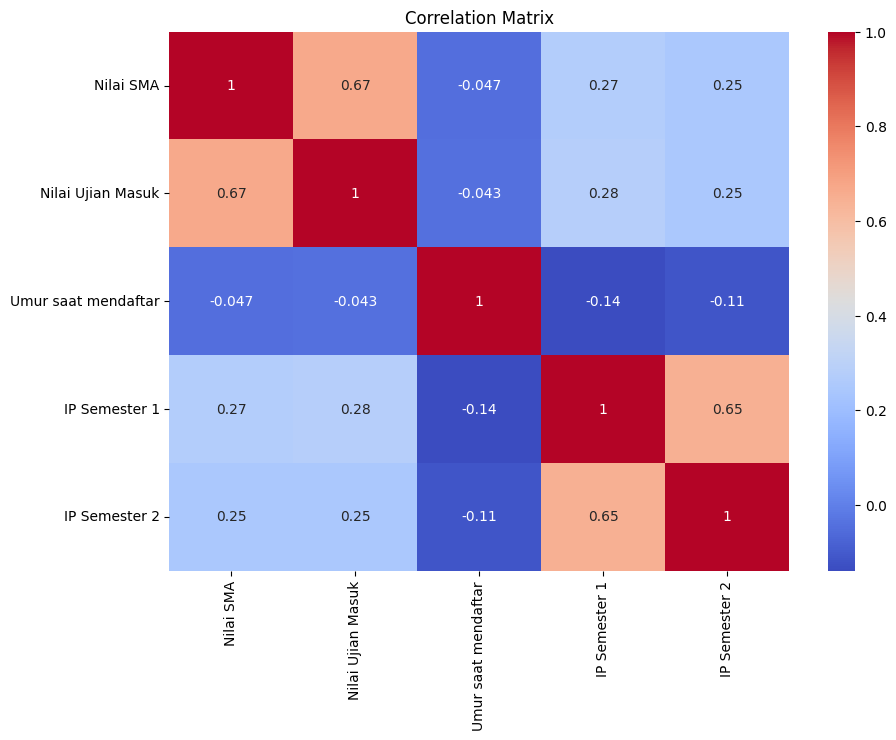

In [54]:
# 1)	Lakukan analisis bivariate
plt.figure(figsize=(10,7))
correlation_matrix = df_no_outliers.select_dtypes(include=np.number).drop(columns=['ID'], errors='ignore').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Kesimpulan Tidak ada dua fitur numerik yang memiliki korelasi sangat tinggi/Masalah multikolinearitas

## SCATTERPLOT DAN REGRESSIONPLOT

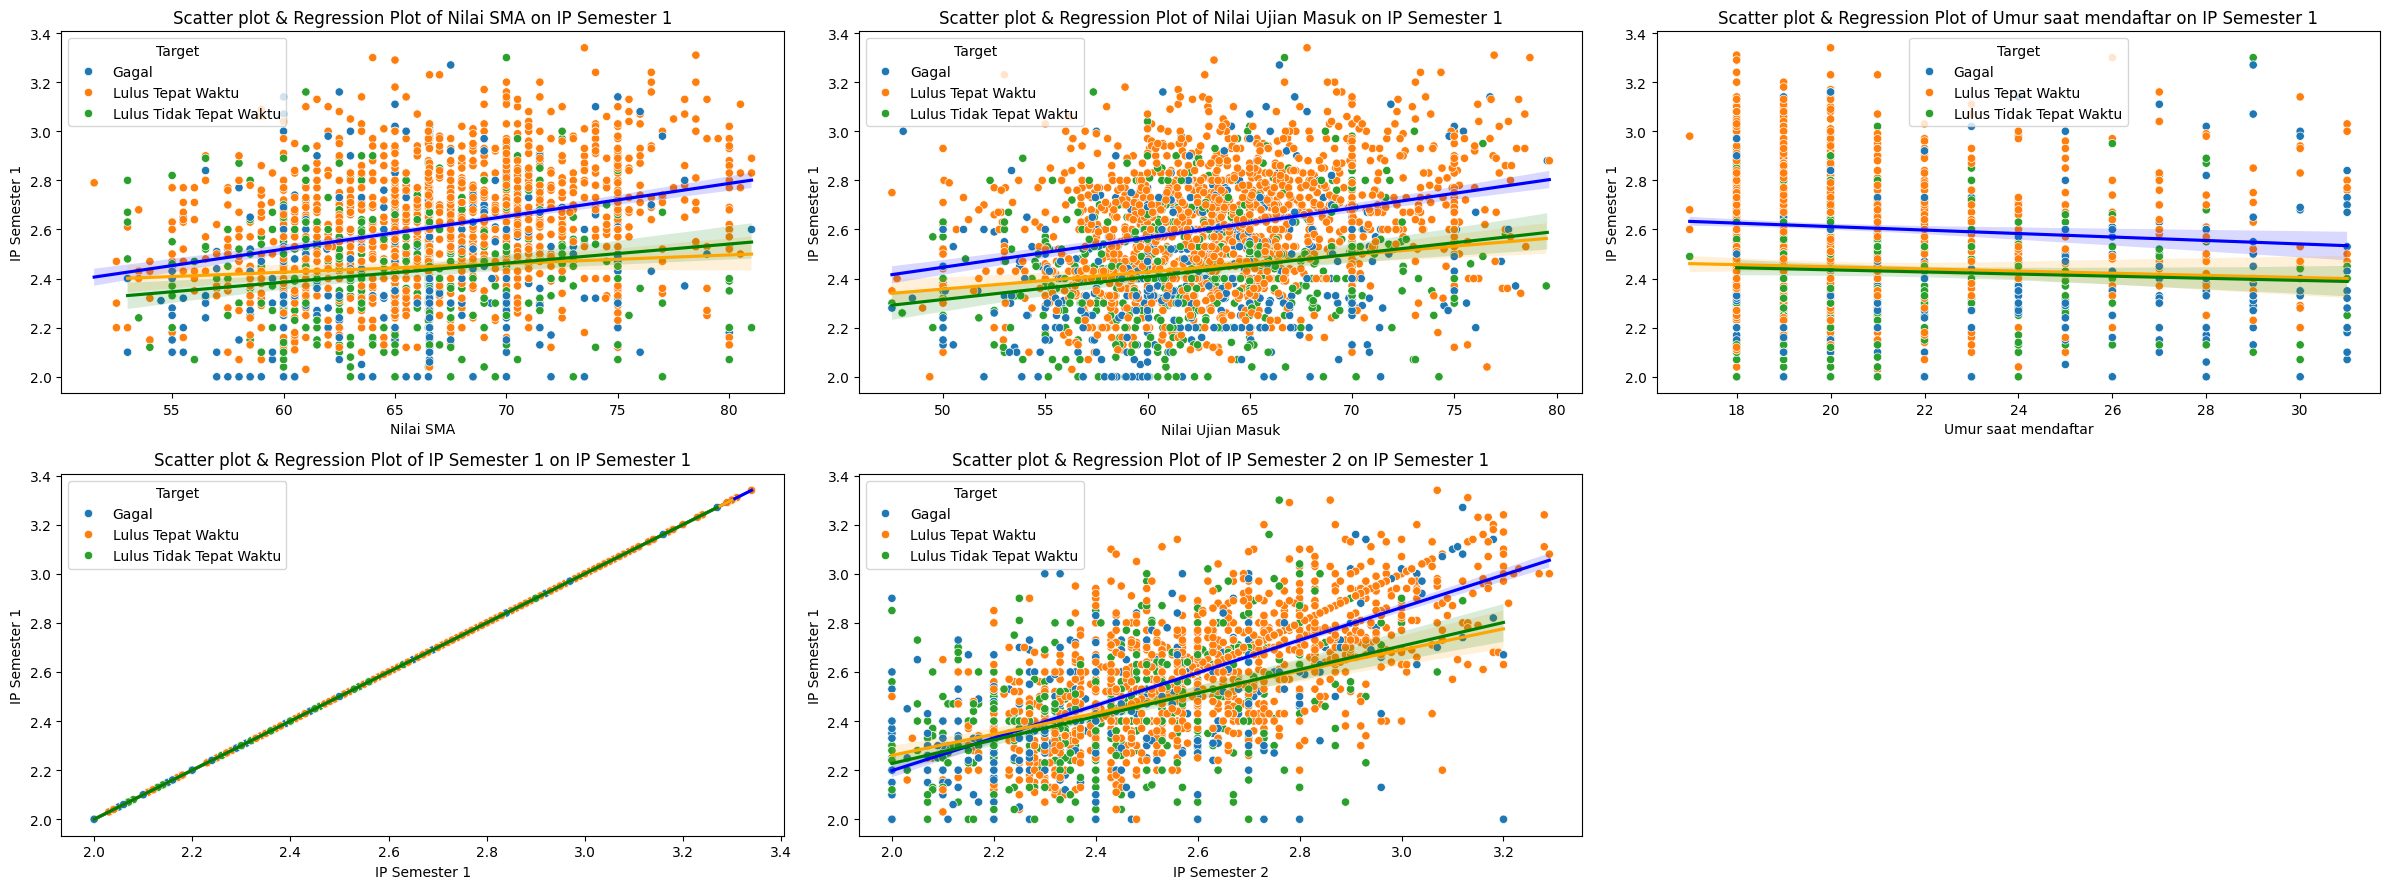

In [ ]:
#scatter plot dan regression plot
numerical_cols = df_no_outliers.select_dtypes(include=np.number).drop(columns=['ID'], errors='ignore').columns.tolist()
n_cols = len(numerical_cols)
grid_cols = 3
grid_rows = (n_cols + grid_cols - 1) // grid_cols
fig2, axs2 = plt.subplots(grid_rows, grid_cols, figsize=(8 * grid_cols, 4.5 * grid_rows))

# Pastikan axs2 berupa array 1D untuk iterasi
axs2 = np.array(axs2).reshape(-1)

for idx, col in enumerate(numerical_cols):
    ax = axs2[idx]
    sns.scatterplot(data=df_no_outliers, x=col, hue='Target', y='IP Semester 1', ax=ax)
    for cat, color in zip(df_no_outliers["Target"].unique(), [ "blue", "orange", "green"]):
        sns.regplot(data=df_no_outliers[df_no_outliers["Target"]==cat], x=col, y='IP Semester 1', scatter=False, color=color ,ax=ax)
    ax.set_title(f'Scatter plot & Regression Plot of {col} on IP Semester 1')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('IP Semester 1')
    ax.grid(False)

# Sembunyikan axis yang tidak terpakai
for j in range(idx + 1, len(axs2)):
    axs2[j].set_visible(False)

plt.tight_layout()
plt.show()

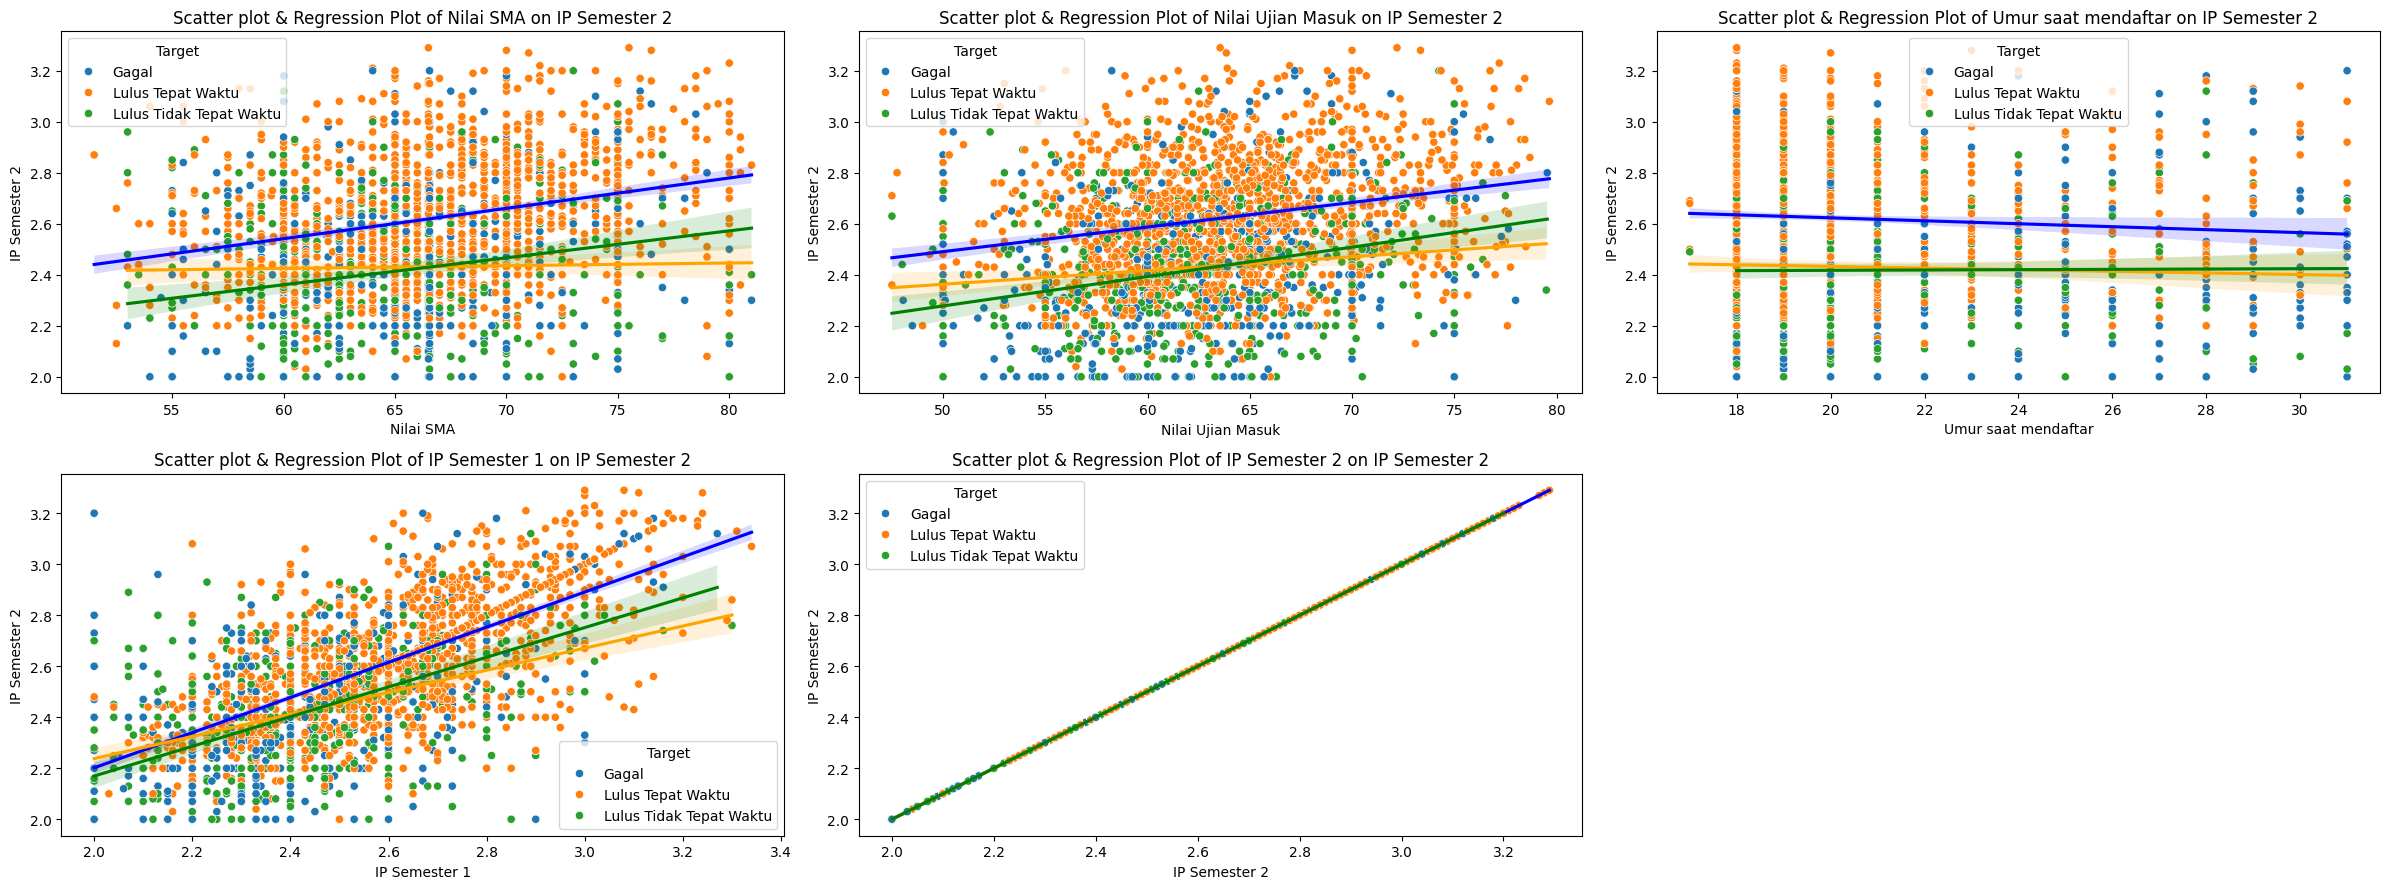

In [126]:
#scatter plot dan regression plot
numerical_cols = df_no_outliers.select_dtypes(include=np.number).drop(columns=['ID'], errors='ignore').columns.tolist()
n_cols = len(numerical_cols)
grid_cols = 3
grid_rows = (n_cols + grid_cols - 1) // grid_cols
fig2, axs2 = plt.subplots(grid_rows, grid_cols, figsize=(8 * grid_cols, 4.5 * grid_rows))

# Pastikan axs2 berupa array 1D untuk iterasi
axs2 = np.array(axs2).reshape(-1)

for idx, col in enumerate(numerical_cols):
    ax = axs2[idx]
    sns.scatterplot(data=df_no_outliers, x=col, hue='Target', y='IP Semester 2', ax=ax)
    for cat, color in zip(df_no_outliers["Target"].unique(), [ "blue", "orange", "green"]):
        sns.regplot(data=df_no_outliers[df_no_outliers["Target"]==cat], x=col, y='IP Semester 2', scatter=False, color=color ,ax=ax)
    ax.set_title(f'Scatter plot & Regression Plot of {col} on IP Semester 2')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('IP Semester 2')
    ax.grid(False)

# Sembunyikan axis yang tidak terpakai
for j in range(idx + 1, len(axs2)):
    axs2[j].set_visible(False)

plt.tight_layout()
plt.show()

# Task 7
Oke, sepertinya sudah siap, tapi kok jumlah data per-kelas nya tidak seimbang ya, ada beberapa algoritma yang akan terpengaruh dengan kondisi ini, kita akan gunakan algoritma **$\color{orange}{\text{(SMOTE)}}$** untuk menyelesaikan masalah ini, jadi kita **$\color{orange}{\text{(akan)}}$** melakukan proses augmentasi data karena **$\color{orange}{\text{(Jumlah Kelas Data Target Sangat Tidak Seimbang Yakni 60, 20, 20)}}$**

Melihat perbandingan kelas datanya

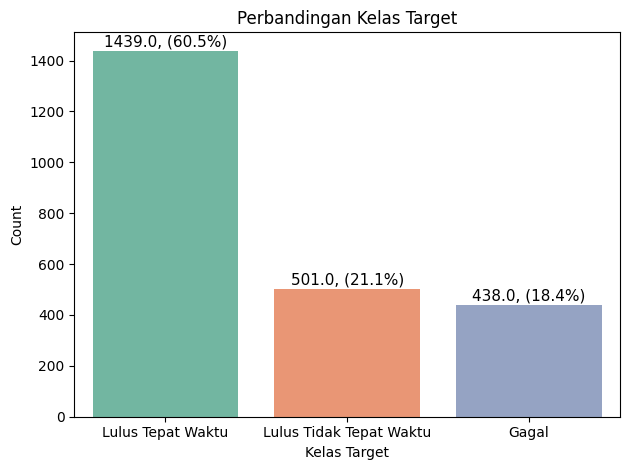

In [142]:
# Plot distribusi kelas target dengan anotasi count dan persentase
value_counts = df_no_outliers['Target'].value_counts()
order = value_counts.index

ax = sns.countplot(data=df_no_outliers, x='Target', order=order, palette='Set2')

total = len(df_no_outliers)
for patch in ax.patches:
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    ax.annotate(f'{height}, ({height/total:.1%})',
                (x, height),
                ha='center', va='bottom',
                fontsize=11, color='black',
                xytext=(0, 1),
                textcoords='offset points')

ax.set_title('Perbandingan Kelas Target')
ax.set_xlabel('Kelas Target')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

Namun untuk melakukan balancing dataset kita hanya melakukannya pada data train saja, sehingga balancing akan dilakukan setelah train test split

## Melakukan Label Encoding dan One Hot Encoding untuk Fitur Kategorikal

Berdasarkan analisis bivariat fitur Berkebutuhan Khusus, Pindahan, Pekerjaan Ibu, Pendidikan Ayah, Daerah Asal dapat tidak dimasukkan dalam model, Namun saya akan menggunakan dua model, yakni dengan seluruh fitur full, model dengan fitur yang mengecualikan fitur yang tidak penting

### DF FULL

In [157]:
df_run=df_no_outliers.copy()

#### One-Hot Encoding DF FULL

In [158]:
cat_vars = ['Status Pernikahan', 'Pekerjaan Ibu', 'Pekerjaan Ayah', 'Program Studi']
for var in cat_vars:
    cat_list = pd.get_dummies(df_run[var], prefix=var)
    data = df_run.join(cat_list)
    df_run = data

# remove categorical data
data_vars = df_run.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars] # filter process
df_run = df_run[to_keep]

#### Label Encoding DF FULL

In [159]:
#df_run['Status Pernikahan'] = df_run['Status Pernikahan'].replace({'Cerai' : 0,'Belum Menikah': 1,'Menikah':2})
df_run['Kelas Siang/Malam'] = df_run['Kelas Siang/Malam'].replace({'Siang' : 0, 'Malam' : 1})
df_run['Pendidikan Terakhir'] = df_run['Pendidikan Terakhir'].replace({'SMA/Sederajat' : 0, 'Perguruan Tinggi' : 1})
df_run['Daerah Asal'] = df_run['Daerah Asal'].replace({'Luar Jawa':0,'Pulau Jawa':1})
df_run['Pendidikan Ibu'] = df_run['Pendidikan Ibu'].replace({'Dibawah SMA/Sederajat':0,'SMA/Sederajat':1, 'D3/S1/Sederajat':2, 'Lebih dari S1':3})
df_run['Pendidikan Ayah'] = df_run['Pendidikan Ayah'].replace({'Dibawah SMA/Sederajat':0,'SMA/Sederajat':1, 'D3/S1/Sederajat':2, 'Lebih dari S1':3})
#df_run['Pekerjaan Ibu'] = df_run['Pekerjaan Ibu'].replace({'Lainnya':0, 'Wiraswasta':1,'Pegawai Swasta':2, 'Pegawai Negri':3})
#df_run['Pekerjaan Ayah'] = df_run['Pekerjaan Ayah'].replace({'Lainnya':0, 'Wiraswasta':1,'Pegawai Swasta':2, 'Pegawai Negri':3})
df_run['Pindahan'] = df_run['Pindahan'].replace({'Tidak':0,'Ya':1})
df_run['Berkebutuhan Khusus'] = df_run['Berkebutuhan Khusus'].replace({'Tidak':0,'Ya':1})
df_run['Status pembayaran semester terakhir'] = df_run['Status pembayaran semester terakhir'].replace({'Belum':0,'Sudah':1})
df_run['Jenis Kelamin'] = df_run['Jenis Kelamin'].replace({'Wanita':0,'Pria':1})
df_run['Beasiswa'] = df_run['Beasiswa'].replace({'Tidak':0,'Ya':1})
df_run['Target'] = df_run['Target'].replace({'Gagal':0,'Lulus Tidak Tepat Waktu':1, 'Lulus Tepat Waktu':2})

In [160]:
df_run.head()

ID  Kelas Siang/Malam  Pendidikan Terakhir  Nilai SMA  Daerah Asal  \
0   2                  0                    0      66.55            1   
1   3                  0                    0      63.50            1   
2   4                  0                    0      62.50            1   
3   5                  0                    1      75.00            1   
4  10                  0                    0      65.00            1   

   Pendidikan Ibu  Pendidikan Ayah  Nilai Ujian Masuk  Pindahan  \
0               0                1              53.00         1   
1               1                3              58.25         0   
2               0                1              60.75         1   
3               3                3              75.00         0   
4               0                1              64.55         1   

   Berkebutuhan Khusus  ...  Program Studi_Manajemen  \
0                    0  ...                    False   
1                    0  ...                    False   
2                    0  ...                    False   
3                    0  ...                    False   
4                    0  ...                    False   

   Program Studi_Pariwisata  Program Studi_Penyiaran  Program Studi_Perbankan  \
0                     False                    False                    False   
1                     False                    False                    False   
2                     False                    False                    False   
3                     False                    False                    False   
4                     False                    False                     True   

   Program Studi_Perpajakan  Program Studi_Perpustakaan  \
0                     False                       False   
1                     False                       False   
2                     False                       False   
3                     False                       False   
4                     False                       False   

  Program Studi_Pertanian  Program Studi_Teknik Industri  \
0                   False                           True   
1                   False                          False   
2                    True                          False   
3                   False                          False   
4                   False                          False   

   Program Studi_Teknik Mesin  Program Studi_Teknologi Informasi  
0                       False                              False  
1                       False                              False  
2                       False                              False  
3                        True                              False  
4                       False                              False  

[5 rows x 44 columns]

### DF REDUCED

In [161]:
df_run_reduced=df_no_outliers.drop(columns=['Berkebutuhan Khusus', 'Pindahan', 'Pekerjaan Ibu', 'Pendidikan Ayah', 'Daerah Asal']).copy()

#### One-Hot Encoding DF REDUCED

In [162]:
cat_vars = ['Status Pernikahan', 'Pekerjaan Ayah', 'Program Studi']
for var in cat_vars:
    cat_list = pd.get_dummies(df_run_reduced[var], prefix=var)
    data = df_run_reduced.join(cat_list)
    df_run_reduced = data

# remove categorical data
data_vars = df_run_reduced.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars] # filter process
df_run_reduced = df_run_reduced[to_keep]

#### Label Encoding DF REDUCED

In [163]:
#df_run['Status Pernikahan'] = df_run['Status Pernikahan'].replace({'Cerai' : 0,'Belum Menikah': 1,'Menikah':2})
df_run_reduced['Kelas Siang/Malam'] = df_run_reduced['Kelas Siang/Malam'].replace({'Siang' : 0, 'Malam' : 1})
df_run_reduced['Pendidikan Terakhir'] = df_run_reduced['Pendidikan Terakhir'].replace({'SMA/Sederajat' : 0, 'Perguruan Tinggi' : 1})
#df_run_reduced['Daerah Asal'] = df_run_reduced['Daerah Asal'].replace({'Luar Jawa':0,'Pulau Jawa':1})
df_run_reduced['Pendidikan Ibu'] = df_run_reduced['Pendidikan Ibu'].replace({'Dibawah SMA/Sederajat':0,'SMA/Sederajat':1, 'D3/S1/Sederajat':2, 'Lebih dari S1':3})
#df_run_reduced['Pendidikan Ayah'] = df_run_reduced['Pendidikan Ayah'].replace({'Dibawah SMA/Sederajat':0,'SMA/Sederajat':1, 'D3/S1/Sederajat':2, 'Lebih dari S1':3})
#df_run['Pekerjaan Ibu'] = df_run['Pekerjaan Ibu'].replace({'Lainnya':0, 'Wiraswasta':1,'Pegawai Swasta':2, 'Pegawai Negri':3})
#df_run['Pekerjaan Ayah'] = df_run['Pekerjaan Ayah'].replace({'Lainnya':0, 'Wiraswasta':1,'Pegawai Swasta':2, 'Pegawai Negri':3})
#df_run_reduced['Pindahan'] = df_run_reduced['Pindahan'].replace({'Tidak':0,'Ya':1})
#df_run_reduced['Berkebutuhan Khusus'] = df_run_reduced['Berkebutuhan Khusus'].replace({'Tidak':0,'Ya':1})
df_run_reduced['Status pembayaran semester terakhir'] = df_run_reduced['Status pembayaran semester terakhir'].replace({'Belum':0,'Sudah':1})
df_run_reduced['Jenis Kelamin'] = df_run_reduced['Jenis Kelamin'].replace({'Wanita':0,'Pria':1})
df_run_reduced['Beasiswa'] = df_run_reduced['Beasiswa'].replace({'Tidak':0,'Ya':1})
df_run_reduced['Target'] = df_run_reduced['Target'].replace({'Gagal':0,'Lulus Tidak Tepat Waktu':1, 'Lulus Tepat Waktu':2})

## Train Test Split

Selanjutnya datanya perlu kita bagi dengan ratio **$\color{orange}{\text{(80)}}$** : **$\color{orange}{\text{(20)}}$**
Dimana **$\color{orange}{\text{(80)}}$** adalah data training
Dan **$\color{orange}{\text{(20)}}$** adalah data testing


In [277]:
# 1)	Lakukan pembagian data training dan testing
X = df_run.drop(columns=['ID', 'Target'])
y = df_run['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [289]:
# 1)	Lakukan pembagian data training dan testing
X_reduced = df_run_reduced.drop(columns=['ID', 'Target'])
y_reduced = df_run_reduced['Target']

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42, stratify=y_reduced)

## Balancing Dataset

In [166]:
# 1)	Augmentasi data untuk balancing kelas (Optional)
def smote_fit_resample(X_set, y_set):

    # Create sampling object
    smote = SMOTE(random_state=123)

    # Balancing set data
    X_smote, y_smote = smote.fit_resample(
        X_set,
        y_set
    )

    # Return balanced data
    return X_smote, y_smote

X_train_smote, y_train_smote = smote_fit_resample(X_train, y_train)
X_train_reduced_smote, y_train_reduced_smote = smote_fit_resample(X_train_reduced, y_train_reduced)

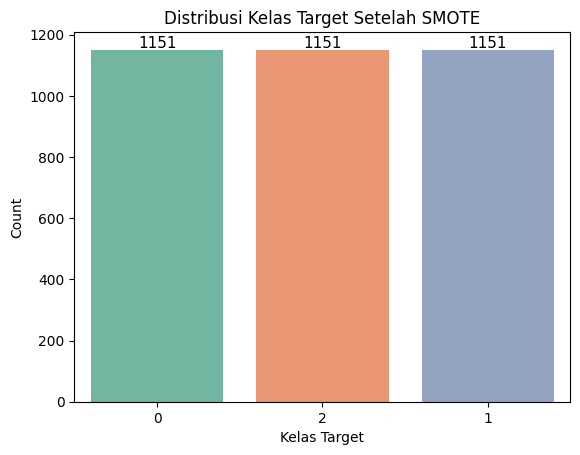

In [ ]:
sns.countplot(x=y_train_smote, palette='Set2')
plt.title('Distribusi Kelas Target Setelah SMOTE')
for i in range(len(y_train_smote.value_counts())):
    count = y_train_smote.value_counts().iloc[i]
    plt.text(i, count + 5, str(count), ha='center', fontsize=11)
plt.xlabel('Kelas Target')
plt.ylabel('Count')
plt.show()

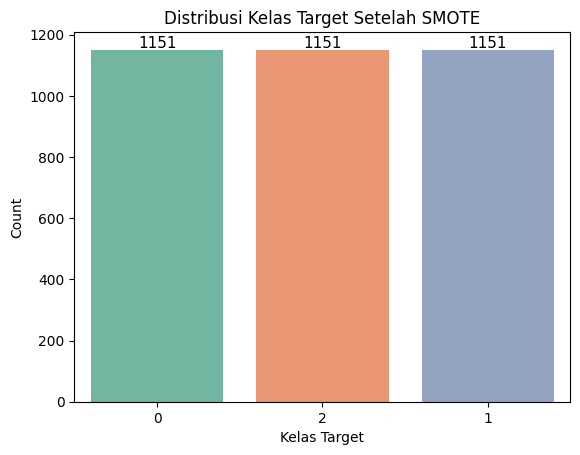

In [171]:
sns.countplot(x=y_train_reduced_smote, palette='Set2')
plt.title('Distribusi Kelas Target Setelah SMOTE')
for i in range(len(y_train_reduced_smote.value_counts())):
    count = y_train_reduced_smote.value_counts().iloc[i]
    plt.text(i, count + 5, str(count), ha='center', fontsize=11)
plt.xlabel('Kelas Target')
plt.ylabel('Count')
plt.show()

# Task 8
Sekarang kita mulai training nya

## DF FULL

### LOGISTIC REGRESSION

In [192]:
# 1)	Lakukan proses training dengan algoritma yang telah dipilih
logit = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, penalty='l2')
logit_fit=logit.fit(X_train_smote, y_train_smote)

#### KFOLD

In [ ]:
# 2)	Lakukan evaluasi model dengan K-fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_validate(
    logit, 
    X_train_smote, 
    y_train_smote, 
    cv=kfold, 
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
    return_train_score=True
)

# Display results
print("=== K-Fold Cross-Validation Results ===\n")
print(f"Accuracy per fold: {cv_results['test_accuracy']}")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.4f} (+/- {cv_results['test_accuracy'].std():.4f})")
print(f"\nPrecision per fold: {cv_results['test_precision_macro']}")
print(f"Mean Precision: {cv_results['test_precision_macro'].mean():.4f} (+/- {cv_results['test_precision_macro'].std():.4f})")
print(f"\nRecall per fold: {cv_results['test_recall_macro']}")
print(f"Mean Recall: {cv_results['test_recall_macro'].mean():.4f} (+/- {cv_results['test_recall_macro'].std():.4f})")
print(f"\nF1-Score per fold: {cv_results['test_f1_macro']}")
print(f"Mean F1-Score: {cv_results['test_f1_macro'].mean():.4f} (+/- {cv_results['test_f1_macro'].std():.4f})")

=== K-Fold Cross-Validation Results ===

Accuracy per fold: [0.67004342 0.65267728 0.69030391 0.61884058 0.66956522]
Mean Accuracy: 0.6603 (+/- 0.0239)

Precision per fold: [0.66993615 0.65074689 0.69601058 0.62715894 0.66553693]
Mean Precision: 0.6619 (+/- 0.0227)

Recall per fold: [0.6689768  0.6519034  0.69281042 0.62011375 0.67005903]
Mean Recall: 0.6608 (+/- 0.0241)

F1-Score per fold: [0.66650797 0.65102767 0.6892119  0.61935143 0.66690336]
Mean F1-Score: 0.6586 (+/- 0.0231)


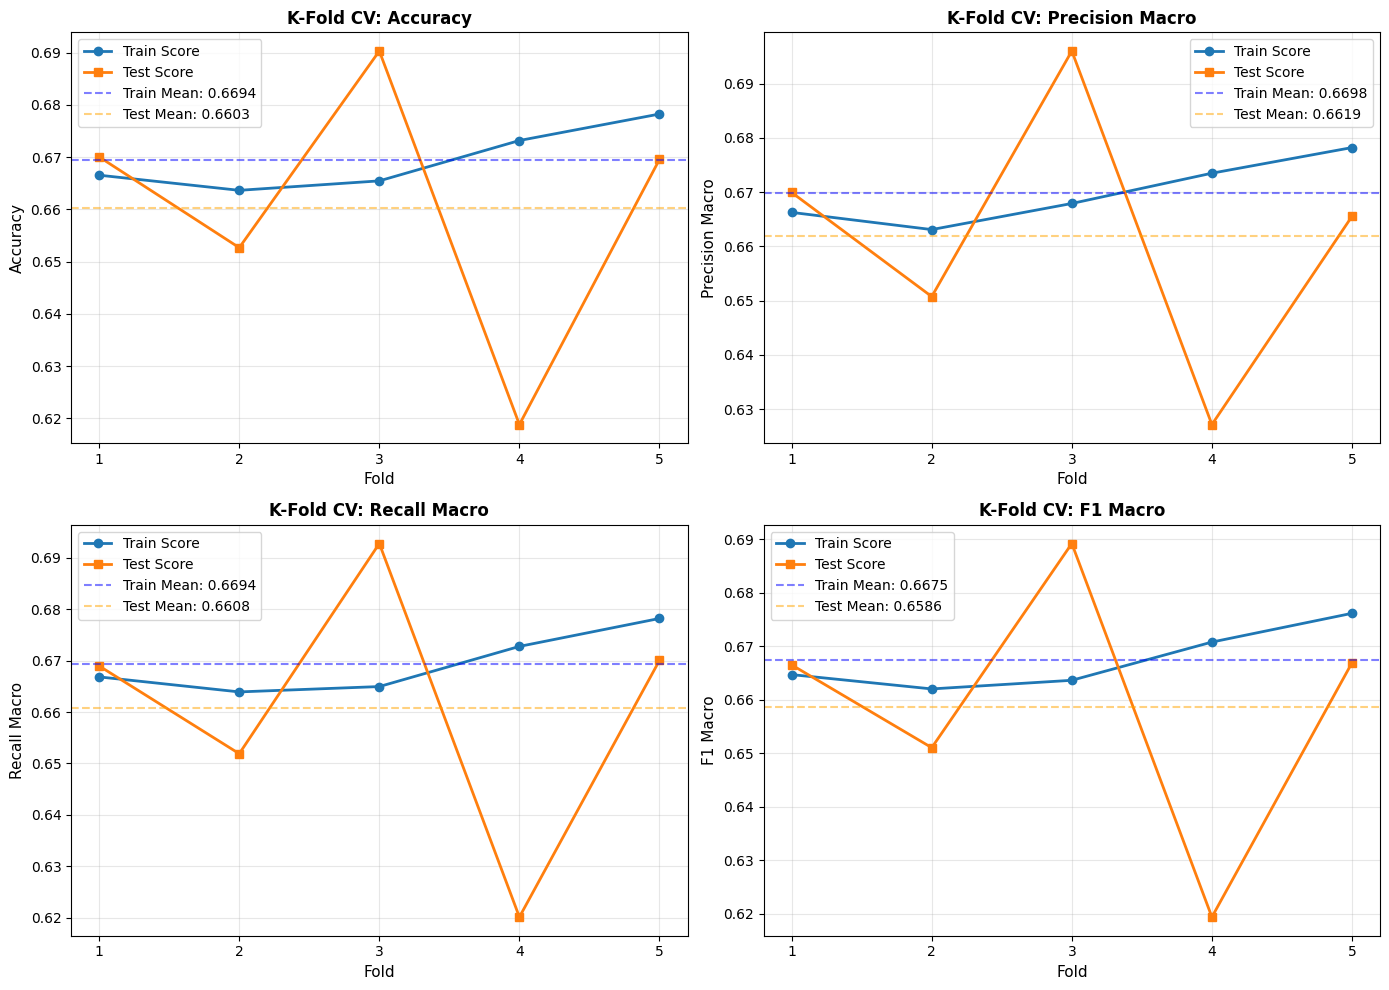


=== Cross-Validation Summary ===


Metric  Train Mean  Train Std  Test Mean  Test Std
0   Accuracy      0.6694     0.0055     0.6603    0.0239
1  Precision      0.6698     0.0054     0.6619    0.0227
2     Recall      0.6694     0.0054     0.6608    0.0241
3   F1-Score      0.6675     0.0053     0.6586    0.0231

In [ ]:
# Visualize K-Fold Cross-Validation Results
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    train_scores = cv_results[f'train_{metric}']
    test_scores = cv_results[f'test_{metric}']
    
    folds = range(1, len(train_scores) + 1)
    
    axes[idx].plot(folds, train_scores, marker='o', label='Train Score', linewidth=2)
    axes[idx].plot(folds, test_scores, marker='s', label='Test Score', linewidth=2)
    axes[idx].axhline(y=train_scores.mean(), color='blue', linestyle='--', alpha=0.5, label=f'Train Mean: {train_scores.mean():.4f}')
    axes[idx].axhline(y=test_scores.mean(), color='orange', linestyle='--', alpha=0.5, label=f'Test Mean: {test_scores.mean():.4f}')
    
    axes[idx].set_xlabel('Fold', fontsize=11)
    axes[idx].set_ylabel(metric.replace('_', ' ').title(), fontsize=11)
    axes[idx].set_title(f'K-Fold CV: {metric.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes[idx].legend(loc='best')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xticks(folds)

plt.tight_layout()
plt.show()

# Summary table of CV results
cv_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train Mean': [cv_results['train_accuracy'].mean(), 
                   cv_results['train_precision_macro'].mean(),
                   cv_results['train_recall_macro'].mean(),
                   cv_results['train_f1_macro'].mean()],
    'Train Std': [cv_results['train_accuracy'].std(), 
                  cv_results['train_precision_macro'].std(),
                  cv_results['train_recall_macro'].std(),
                  cv_results['train_f1_macro'].std()],
    'Test Mean': [cv_results['test_accuracy'].mean(), 
                  cv_results['test_precision_macro'].mean(),
                  cv_results['test_recall_macro'].mean(),
                  cv_results['test_f1_macro'].mean()],
    'Test Std': [cv_results['test_accuracy'].std(), 
                 cv_results['test_precision_macro'].std(),
                 cv_results['test_recall_macro'].std(),
                 cv_results['test_f1_macro'].std()]
})

print("\n=== Cross-Validation Summary ===")
display(cv_summary.round(4))

Hasil dari Evaluasi Kfold menunjukkan score yang masih bisa ditingkatkan, karena rata-rata semua metrik evaluasi hanya sekitar 66%

#### Hyperparameter Tuning

In [187]:
logit_gs_model = LogisticRegression()

param_grid = {
    "C": [1,0.8,0.5],
    "penalty": ['l1','l2'],
    "solver": ['saga', 'lbfgs', 'newton-cg'],
    "multi_class":['multinomial'],
    }

logit_gs = GridSearchCV(
    estimator=logit_gs_model,
    param_grid=param_grid, 
    cv=5,  
    scoring='accuracy'
)

logit_gs_fit = logit_gs.fit(X_train_smote,y_train_smote)

In [188]:
print("Best Hyperparameters: ", logit_gs_fit.best_params_)
print("Best Score: ", logit_gs_fit.best_score_)

Best Hyperparameters:  {'C': 0.8, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score:  0.679161895173976


In [185]:
# 2)	Lakukan evaluasi model dengan K-fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_validate(
    logit_gs, 
    X_train_smote, 
    y_train_smote, 
    cv=kfold, 
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
    return_train_score=True
)

# Display results
print("=== K-Fold Cross-Validation Results ===\n")
print(f"Accuracy per fold: {cv_results['test_accuracy']}")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.4f} (+/- {cv_results['test_accuracy'].std():.4f})")
print(f"\nPrecision per fold: {cv_results['test_precision_macro']}")
print(f"Mean Precision: {cv_results['test_precision_macro'].mean():.4f} (+/- {cv_results['test_precision_macro'].std():.4f})")
print(f"\nRecall per fold: {cv_results['test_recall_macro']}")
print(f"Mean Recall: {cv_results['test_recall_macro'].mean():.4f} (+/- {cv_results['test_recall_macro'].std():.4f})")
print(f"\nF1-Score per fold: {cv_results['test_f1_macro']}")
print(f"Mean F1-Score: {cv_results['test_f1_macro'].mean():.4f} (+/- {cv_results['test_f1_macro'].std():.4f})")

=== K-Fold Cross-Validation Results ===

Accuracy per fold: [0.67293777 0.69464544 0.71345876 0.65942029 0.69565217]
Mean Accuracy: 0.6872 (+/- 0.0189)

Precision per fold: [0.66732931 0.68892396 0.71478096 0.65738104 0.69048958]
Mean Precision: 0.6838 (+/- 0.0200)

Recall per fold: [0.66980234 0.69366607 0.71606685 0.66116079 0.69762453]
Mean Recall: 0.6877 (+/- 0.0198)

F1-Score per fold: [0.66400943 0.68905357 0.70818567 0.6551434  0.68995639]
Mean F1-Score: 0.6813 (+/- 0.0192)


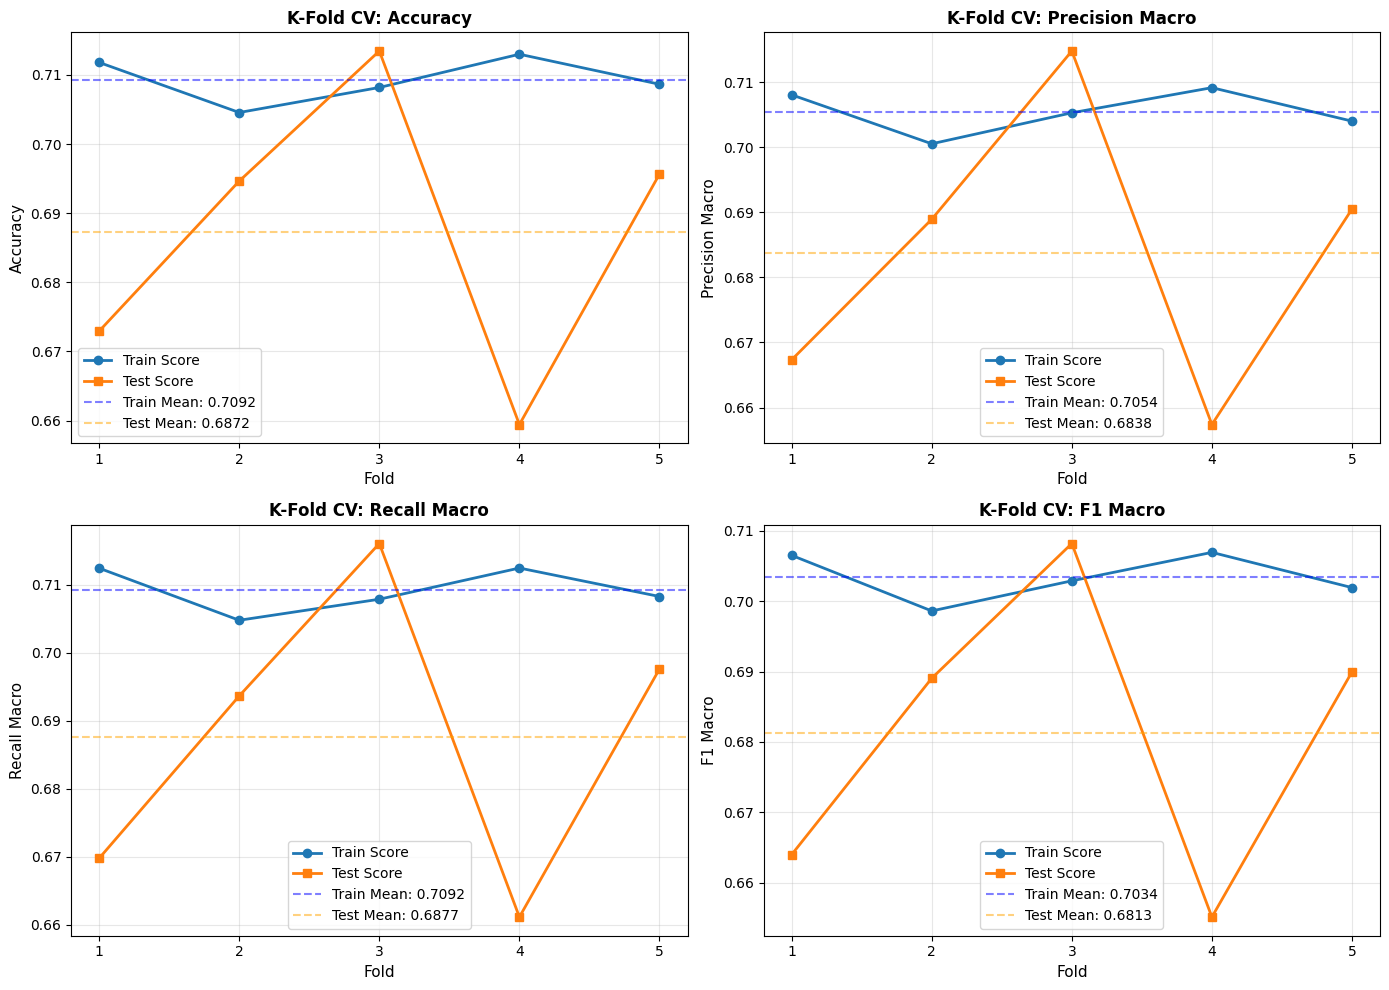


=== Cross-Validation Summary ===


Metric  Train Mean  Train Std  Test Mean  Test Std
0   Accuracy      0.7092     0.0030     0.6872    0.0189
1  Precision      0.7054     0.0031     0.6838    0.0200
2     Recall      0.7092     0.0029     0.6877    0.0198
3   F1-Score      0.7034     0.0031     0.6813    0.0192

In [189]:
# Visualize K-Fold Cross-Validation Results
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    train_scores = cv_results[f'train_{metric}']
    test_scores = cv_results[f'test_{metric}']
    
    folds = range(1, len(train_scores) + 1)
    
    axes[idx].plot(folds, train_scores, marker='o', label='Train Score', linewidth=2)
    axes[idx].plot(folds, test_scores, marker='s', label='Test Score', linewidth=2)
    axes[idx].axhline(y=train_scores.mean(), color='blue', linestyle='--', alpha=0.5, label=f'Train Mean: {train_scores.mean():.4f}')
    axes[idx].axhline(y=test_scores.mean(), color='orange', linestyle='--', alpha=0.5, label=f'Test Mean: {test_scores.mean():.4f}')
    
    axes[idx].set_xlabel('Fold', fontsize=11)
    axes[idx].set_ylabel(metric.replace('_', ' ').title(), fontsize=11)
    axes[idx].set_title(f'K-Fold CV: {metric.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes[idx].legend(loc='best')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xticks(folds)

plt.tight_layout()
plt.show()

# Summary table of CV results
cv_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train Mean': [cv_results['train_accuracy'].mean(), 
                   cv_results['train_precision_macro'].mean(),
                   cv_results['train_recall_macro'].mean(),
                   cv_results['train_f1_macro'].mean()],
    'Train Std': [cv_results['train_accuracy'].std(), 
                  cv_results['train_precision_macro'].std(),
                  cv_results['train_recall_macro'].std(),
                  cv_results['train_f1_macro'].std()],
    'Test Mean': [cv_results['test_accuracy'].mean(), 
                  cv_results['test_precision_macro'].mean(),
                  cv_results['test_recall_macro'].mean(),
                  cv_results['test_f1_macro'].mean()],
    'Test Std': [cv_results['test_accuracy'].std(), 
                 cv_results['test_precision_macro'].std(),
                 cv_results['test_recall_macro'].std(),
                 cv_results['test_f1_macro'].std()]
})

print("\n=== Cross-Validation Summary ===")
display(cv_summary.round(4))

### Random Forest

In [195]:
# insialisasi model random forest untuk klasifikasi
random_forest = RandomForestClassifier(n_estimators = 100,
                                       criterion = "gini",
                                       max_features = "sqrt",
                                       max_depth=30,
                                       min_samples_leaf=8,
                                       random_state = 123)

In [209]:
# fit random forest model klasifikasi
random_forest_fit=random_forest.fit(X_train_smote, y_train_smote)

#### KFOLD Random Forest

In [205]:
# 2)	Lakukan evaluasi model dengan K-fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_validate(
    random_forest, 
    X_train_smote, 
    y_train_smote, 
    cv=kfold, 
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
    return_train_score=True
)

# Display results
print("=== K-Fold Cross-Validation Results ===\n")
print(f"Accuracy per fold: {cv_results['test_accuracy']}")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.4f} (+/- {cv_results['test_accuracy'].std():.4f})")
print(f"\nPrecision per fold: {cv_results['test_precision_macro']}")
print(f"Mean Precision: {cv_results['test_precision_macro'].mean():.4f} (+/- {cv_results['test_precision_macro'].std():.4f})")
print(f"\nRecall per fold: {cv_results['test_recall_macro']}")
print(f"Mean Recall: {cv_results['test_recall_macro'].mean():.4f} (+/- {cv_results['test_recall_macro'].std():.4f})")
print(f"\nF1-Score per fold: {cv_results['test_f1_macro']}")
print(f"Mean F1-Score: {cv_results['test_f1_macro'].mean():.4f} (+/- {cv_results['test_f1_macro'].std():.4f})")

=== K-Fold Cross-Validation Results ===

Accuracy per fold: [0.74819103 0.74674385 0.7568741  0.70869565 0.75072464]
Mean Accuracy: 0.7422 (+/- 0.0171)

Precision per fold: [0.75279816 0.75538832 0.76379418 0.72094955 0.75059696]
Mean Precision: 0.7487 (+/- 0.0146)

Recall per fold: [0.74809574 0.74593088 0.75781795 0.70929866 0.75101211]
Mean Recall: 0.7424 (+/- 0.0170)

F1-Score per fold: [0.748382   0.74817606 0.75699708 0.71033272 0.75050775]
Mean F1-Score: 0.7429 (+/- 0.0166)


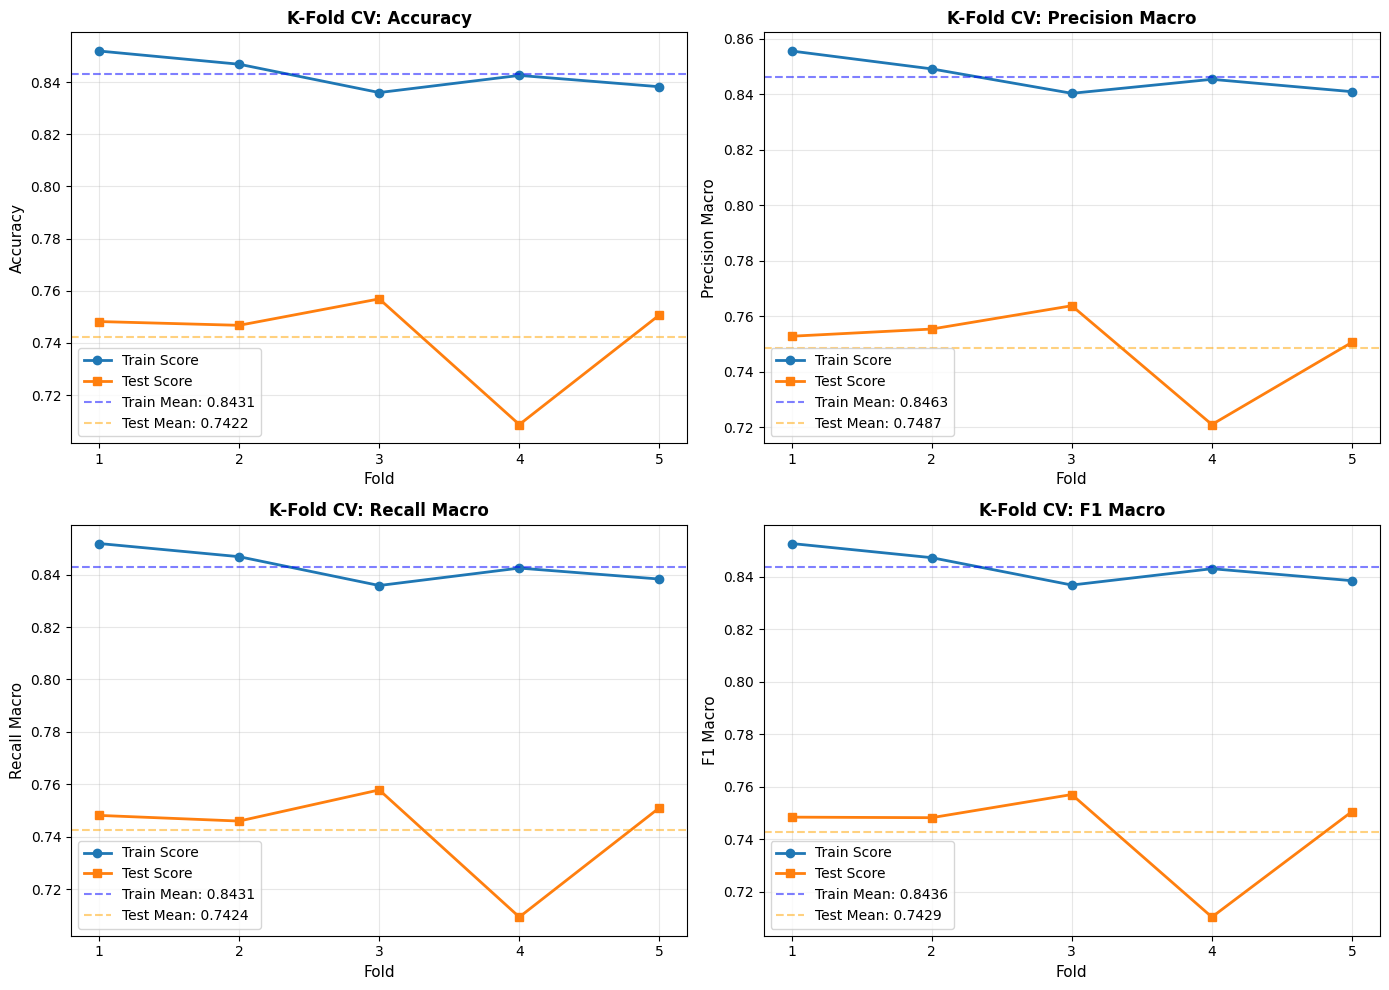


=== Cross-Validation Summary ===


Metric  Train Mean  Train Std  Test Mean  Test Std
0   Accuracy      0.8431     0.0058     0.7422    0.0171
1  Precision      0.8463     0.0057     0.7487    0.0146
2     Recall      0.8431     0.0058     0.7424    0.0170
3   F1-Score      0.8436     0.0058     0.7429    0.0166

In [206]:
# Visualize K-Fold Cross-Validation Results
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    train_scores = cv_results[f'train_{metric}']
    test_scores = cv_results[f'test_{metric}']
    
    folds = range(1, len(train_scores) + 1)
    
    axes[idx].plot(folds, train_scores, marker='o', label='Train Score', linewidth=2)
    axes[idx].plot(folds, test_scores, marker='s', label='Test Score', linewidth=2)
    axes[idx].axhline(y=train_scores.mean(), color='blue', linestyle='--', alpha=0.5, label=f'Train Mean: {train_scores.mean():.4f}')
    axes[idx].axhline(y=test_scores.mean(), color='orange', linestyle='--', alpha=0.5, label=f'Test Mean: {test_scores.mean():.4f}')
    
    axes[idx].set_xlabel('Fold', fontsize=11)
    axes[idx].set_ylabel(metric.replace('_', ' ').title(), fontsize=11)
    axes[idx].set_title(f'K-Fold CV: {metric.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes[idx].legend(loc='best')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xticks(folds)

plt.tight_layout()
plt.show()

# Summary table of CV results
cv_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train Mean': [cv_results['train_accuracy'].mean(), 
                   cv_results['train_precision_macro'].mean(),
                   cv_results['train_recall_macro'].mean(),
                   cv_results['train_f1_macro'].mean()],
    'Train Std': [cv_results['train_accuracy'].std(), 
                  cv_results['train_precision_macro'].std(),
                  cv_results['train_recall_macro'].std(),
                  cv_results['train_f1_macro'].std()],
    'Test Mean': [cv_results['test_accuracy'].mean(), 
                  cv_results['test_precision_macro'].mean(),
                  cv_results['test_recall_macro'].mean(),
                  cv_results['test_f1_macro'].mean()],
    'Test Std': [cv_results['test_accuracy'].std(), 
                 cv_results['test_precision_macro'].std(),
                 cv_results['test_recall_macro'].std(),
                 cv_results['test_f1_macro'].std()]
})

print("\n=== Cross-Validation Summary ===")
display(cv_summary.round(4))

#### Hyperparameter Random Forest

In [218]:
random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [100,200,300], 
               'max_depth': [None,10,20,30], 
               'criterion': ['gini', 'entropy']}

random_forest_gs = GridSearchCV(
        estimator=random_forest,
        param_grid = param_grid, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )

rf_gs_fit = random_forest_gs.fit(X_train_smote, y_train_smote)

print(rf_gs_fit.best_params_)
print(rf_gs_fit.best_score_)

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}
nan


### NEURAL NETWORK

In [278]:
# Split the training data into training and validation sets
X_test, X_valid, y_test, y_valid = train_test_split(X_test,
                                                    y_test,
                                                    test_size=0.5,
                                                    random_state=42,
                                                    stratify=y_test)

In [279]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder pada y train
label_encoder.fit(y_train_smote)

# transform label
y_train_encoded = label_encoder.transform(y_train_smote)
y_test_encoded = label_encoder.transform(y_test)
y_valid_encoded=label_encoder.transform(y_valid)

In [284]:
def model_1():
    model = tf.keras.Sequential([
        # Input layer
        tf.keras.layers.Input(shape=(X_train_smote.shape[1],)),
        
        # Batch Normalization untuk stabilisasi training
        tf.keras.layers.BatchNormalization(),
        
        # Hidden layers dengan arsitektur yang lebih baik
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        
        # Output layer - gunakan softmax untuk multiclass classification
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Adjust learning rate
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
modelann = model_1()

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model with early stopping
ann_fit = modelann.fit(X_train_smote, y_train_encoded, epochs=150, batch_size=32, validation_data=(X_valid, y_valid_encoded), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = modelann.evaluate(X_test, y_test_encoded)
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3425 - loss: 1.5850 - val_accuracy: 0.1975 - val_loss: 1.4723
Epoch 2/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3661 - loss: 1.3682 - val_accuracy: 0.5336 - val_loss: 1.0028
Epoch 3/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4243 - loss: 1.2299 - val_accuracy: 0.5966 - val_loss: 0.9204
Epoch 4/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4624 - loss: 1.1627 - val_accuracy: 0.6092 - val_loss: 0.8871
Epoch 5/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4669 - loss: 1.1281 - val_accuracy: 0.6387 - val_loss: 0.8621
Epoch 6/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4881 - loss: 1.0728 - val_accuracy: 0.6555 - val_loss: 0.8496
Epoch 7/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5033 - loss: 1.0305 - val_accuracy: 0.6471 - val_loss: 0.8325
Epoch 8/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5543 - loss: 0.9982 - val_accu

## DF REDUCED

### LOGISTIC REGRESSION

In [255]:
# 1)	Lakukan proses training dengan algoritma yang telah dipilih
logit = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, penalty='l2')
logit_fit_reduced=logit.fit(X_train_reduced_smote, y_train_reduced_smote)

#### KFOLD

In [256]:
# 2)	Lakukan evaluasi model dengan K-fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_validate(
    logit, 
    X_train_reduced_smote, 
    y_train_reduced_smote, 
    cv=kfold, 
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
    return_train_score=True
)

# Display results
print("=== K-Fold Cross-Validation Results ===\n")
print(f"Accuracy per fold: {cv_results['test_accuracy']}")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.4f} (+/- {cv_results['test_accuracy'].std():.4f})")
print(f"\nPrecision per fold: {cv_results['test_precision_macro']}")
print(f"Mean Precision: {cv_results['test_precision_macro'].mean():.4f} (+/- {cv_results['test_precision_macro'].std():.4f})")
print(f"\nRecall per fold: {cv_results['test_recall_macro']}")
print(f"Mean Recall: {cv_results['test_recall_macro'].mean():.4f} (+/- {cv_results['test_recall_macro'].std():.4f})")
print(f"\nF1-Score per fold: {cv_results['test_f1_macro']}")
print(f"Mean F1-Score: {cv_results['test_f1_macro'].mean():.4f} (+/- {cv_results['test_f1_macro'].std():.4f})")

=== K-Fold Cross-Validation Results ===

Accuracy per fold: [0.66714906 0.63531114 0.65267728 0.59275362 0.63913043]
Mean Accuracy: 0.6374 (+/- 0.0250)

Precision per fold: [0.66288085 0.64104244 0.6559557  0.60811161 0.63624772]
Mean Precision: 0.6408 (+/- 0.0190)

Recall per fold: [0.66477521 0.6343324  0.65388636 0.59378902 0.63958622]
Mean Recall: 0.6373 (+/- 0.0242)

F1-Score per fold: [0.66173322 0.63637762 0.65173133 0.59448074 0.63750256]
Mean F1-Score: 0.6364 (+/- 0.0230)


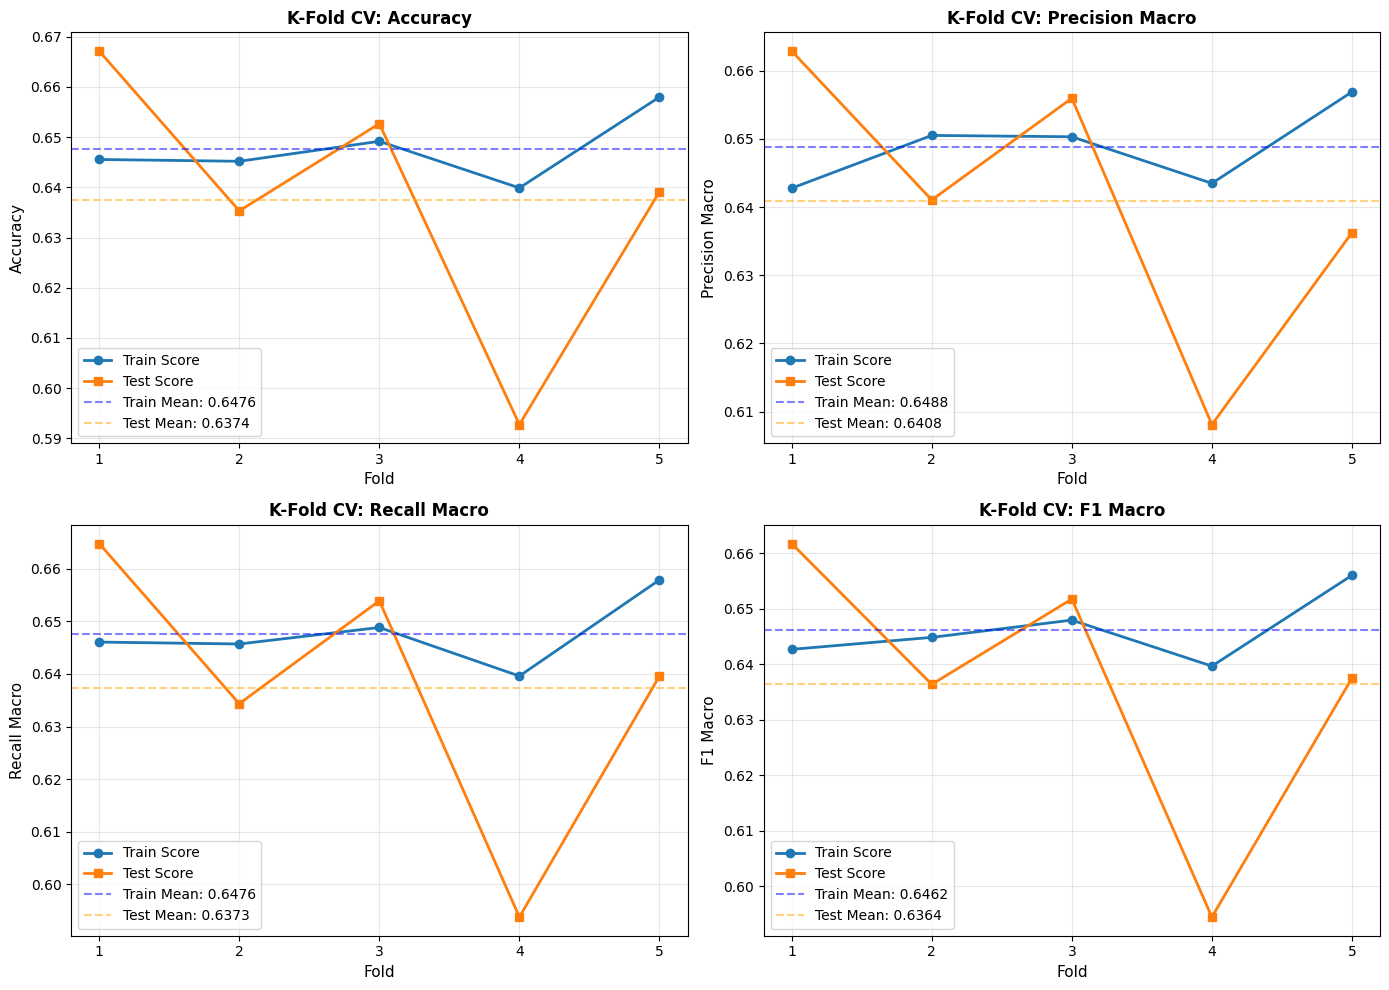


=== Cross-Validation Summary ===


Metric  Train Mean  Train Std  Test Mean  Test Std
0   Accuracy      0.6476     0.0060     0.6374    0.0250
1  Precision      0.6488     0.0052     0.6408    0.0190
2     Recall      0.6476     0.0060     0.6373    0.0242
3   F1-Score      0.6462     0.0056     0.6364    0.0230

In [257]:
# Visualize K-Fold Cross-Validation Results
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    train_scores = cv_results[f'train_{metric}']
    test_scores = cv_results[f'test_{metric}']
    
    folds = range(1, len(train_scores) + 1)
    
    axes[idx].plot(folds, train_scores, marker='o', label='Train Score', linewidth=2)
    axes[idx].plot(folds, test_scores, marker='s', label='Test Score', linewidth=2)
    axes[idx].axhline(y=train_scores.mean(), color='blue', linestyle='--', alpha=0.5, label=f'Train Mean: {train_scores.mean():.4f}')
    axes[idx].axhline(y=test_scores.mean(), color='orange', linestyle='--', alpha=0.5, label=f'Test Mean: {test_scores.mean():.4f}')
    
    axes[idx].set_xlabel('Fold', fontsize=11)
    axes[idx].set_ylabel(metric.replace('_', ' ').title(), fontsize=11)
    axes[idx].set_title(f'K-Fold CV: {metric.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes[idx].legend(loc='best')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xticks(folds)

plt.tight_layout()
plt.show()

# Summary table of CV results
cv_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train Mean': [cv_results['train_accuracy'].mean(), 
                   cv_results['train_precision_macro'].mean(),
                   cv_results['train_recall_macro'].mean(),
                   cv_results['train_f1_macro'].mean()],
    'Train Std': [cv_results['train_accuracy'].std(), 
                  cv_results['train_precision_macro'].std(),
                  cv_results['train_recall_macro'].std(),
                  cv_results['train_f1_macro'].std()],
    'Test Mean': [cv_results['test_accuracy'].mean(), 
                  cv_results['test_precision_macro'].mean(),
                  cv_results['test_recall_macro'].mean(),
                  cv_results['test_f1_macro'].mean()],
    'Test Std': [cv_results['test_accuracy'].std(), 
                 cv_results['test_precision_macro'].std(),
                 cv_results['test_recall_macro'].std(),
                 cv_results['test_f1_macro'].std()]
})

print("\n=== Cross-Validation Summary ===")
display(cv_summary.round(4))

#### Hyperparameter Tuning

In [262]:
logit_gs_model = LogisticRegression()

param_grid = {
    "C": [1,0.8,0.5],
    "penalty": ['l1','l2'],
    "solver": ['saga', 'lbfgs', 'newton-cg'],
    "multi_class":['multinomial'],
    }

logit_gs = GridSearchCV(
    estimator=logit_gs_model,
    param_grid=param_grid, 
    cv=5,  
    scoring='accuracy'
)

logit_gs_fit_reduced = logit_gs.fit(X_train_reduced_smote,y_train_reduced_smote)

In [263]:
print("Best Hyperparameters: ", logit_gs_fit_reduced.best_params_)
print("Best Score: ", logit_gs_fit_reduced.best_score_)

Best Hyperparameters:  {'C': 1, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score:  0.6739424065102038


### Random Forest

In [266]:
# insialisasi model random forest untuk klasifikasi
random_forest = RandomForestClassifier(n_estimators = 100,
                                       criterion = "gini",
                                       max_features = "sqrt",
                                       max_depth=30,
                                       min_samples_leaf=8,
                                       random_state = 123)

In [267]:
# fit random forest model klasifikasi
random_forest_fit_reduced = random_forest.fit(X_train_reduced_smote, y_train_reduced_smote)

#### KFOLD

In [268]:
# 2)	Lakukan evaluasi model dengan K-fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_validate(
    random_forest, 
    X_train_reduced_smote, 
    y_train_reduced_smote, 
    cv=kfold, 
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
    return_train_score=True
)

# Display results
print("=== K-Fold Cross-Validation Results ===\n")
print(f"Accuracy per fold: {cv_results['test_accuracy']}")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.4f} (+/- {cv_results['test_accuracy'].std():.4f})")
print(f"\nPrecision per fold: {cv_results['test_precision_macro']}")
print(f"Mean Precision: {cv_results['test_precision_macro'].mean():.4f} (+/- {cv_results['test_precision_macro'].std():.4f})")
print(f"\nRecall per fold: {cv_results['test_recall_macro']}")
print(f"Mean Recall: {cv_results['test_recall_macro'].mean():.4f} (+/- {cv_results['test_recall_macro'].std():.4f})")
print(f"\nF1-Score per fold: {cv_results['test_f1_macro']}")
print(f"Mean F1-Score: {cv_results['test_f1_macro'].mean():.4f} (+/- {cv_results['test_f1_macro'].std():.4f})")

=== K-Fold Cross-Validation Results ===

Accuracy per fold: [0.74529667 0.723589   0.72793054 0.66666667 0.73188406]
Mean Accuracy: 0.7191 (+/- 0.0272)

Precision per fold: [0.74955059 0.73370082 0.7320856  0.68575733 0.73178672]
Mean Precision: 0.7266 (+/- 0.0215)

Recall per fold: [0.74573241 0.72264369 0.72870531 0.66721691 0.73133157]
Mean Recall: 0.7191 (+/- 0.0270)

F1-Score per fold: [0.74530537 0.72542497 0.72764476 0.66883526 0.73109661]
Mean F1-Score: 0.7197 (+/- 0.0263)


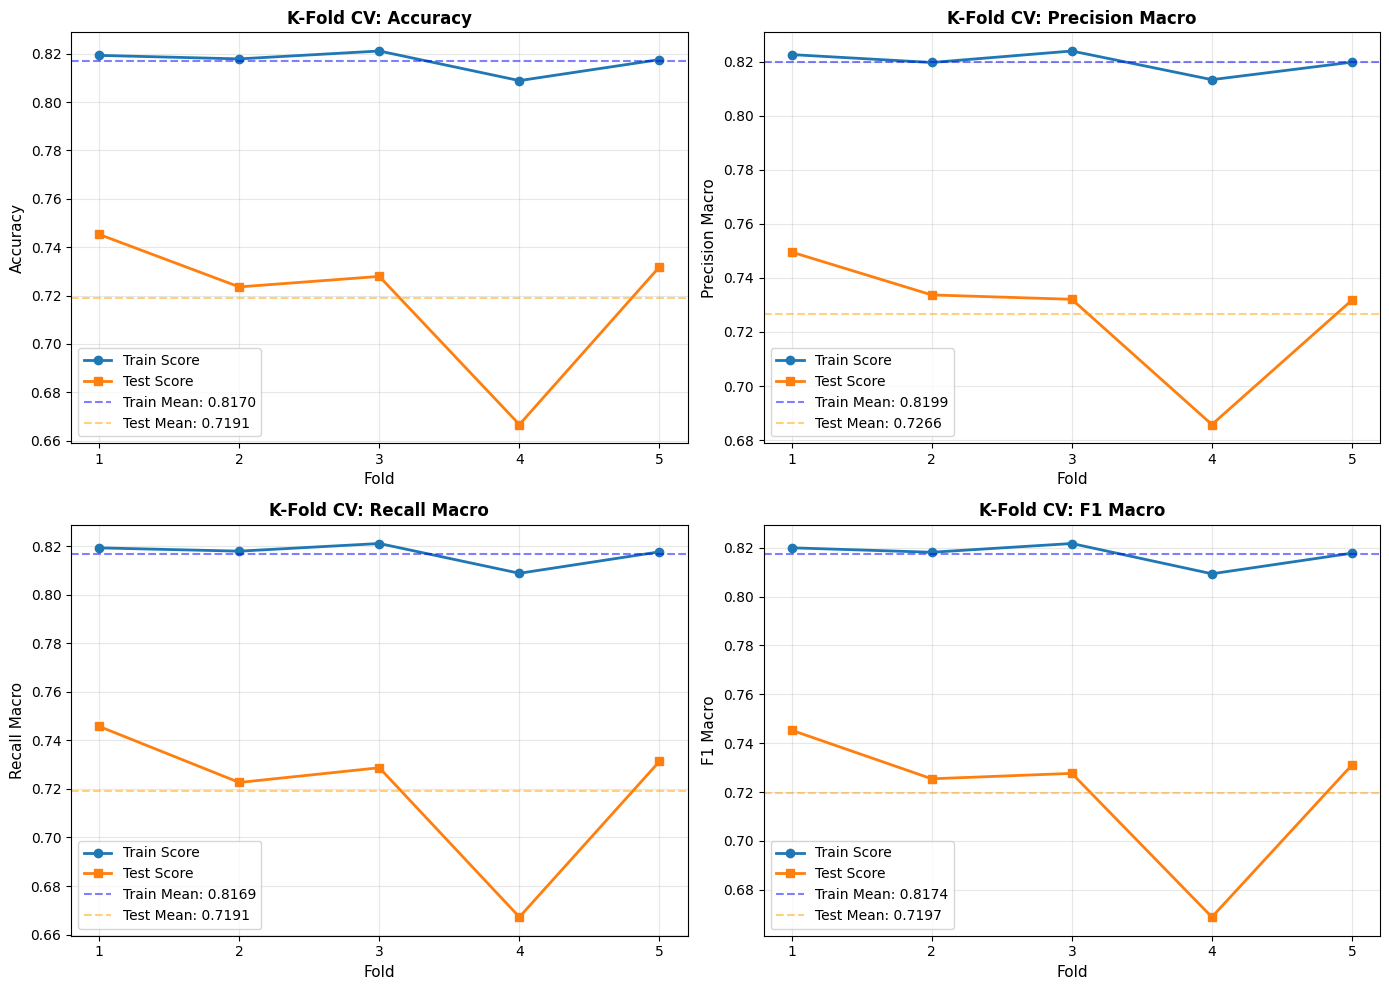


=== Cross-Validation Summary ===


Metric  Train Mean  Train Std  Test Mean  Test Std
0   Accuracy      0.8170     0.0042     0.7191    0.0272
1  Precision      0.8199     0.0037     0.7266    0.0215
2     Recall      0.8169     0.0042     0.7191    0.0270
3   F1-Score      0.8174     0.0043     0.7197    0.0263

In [269]:
# Visualize K-Fold Cross-Validation Results
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    train_scores = cv_results[f'train_{metric}']
    test_scores = cv_results[f'test_{metric}']
    
    folds = range(1, len(train_scores) + 1)
    
    axes[idx].plot(folds, train_scores, marker='o', label='Train Score', linewidth=2)
    axes[idx].plot(folds, test_scores, marker='s', label='Test Score', linewidth=2)
    axes[idx].axhline(y=train_scores.mean(), color='blue', linestyle='--', alpha=0.5, label=f'Train Mean: {train_scores.mean():.4f}')
    axes[idx].axhline(y=test_scores.mean(), color='orange', linestyle='--', alpha=0.5, label=f'Test Mean: {test_scores.mean():.4f}')
    
    axes[idx].set_xlabel('Fold', fontsize=11)
    axes[idx].set_ylabel(metric.replace('_', ' ').title(), fontsize=11)
    axes[idx].set_title(f'K-Fold CV: {metric.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes[idx].legend(loc='best')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xticks(folds)

plt.tight_layout()
plt.show()

# Summary table of CV results
cv_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train Mean': [cv_results['train_accuracy'].mean(), 
                   cv_results['train_precision_macro'].mean(),
                   cv_results['train_recall_macro'].mean(),
                   cv_results['train_f1_macro'].mean()],
    'Train Std': [cv_results['train_accuracy'].std(), 
                  cv_results['train_precision_macro'].std(),
                  cv_results['train_recall_macro'].std(),
                  cv_results['train_f1_macro'].std()],
    'Test Mean': [cv_results['test_accuracy'].mean(), 
                  cv_results['test_precision_macro'].mean(),
                  cv_results['test_recall_macro'].mean(),
                  cv_results['test_f1_macro'].mean()],
    'Test Std': [cv_results['test_accuracy'].std(), 
                 cv_results['test_precision_macro'].std(),
                 cv_results['test_recall_macro'].std(),
                 cv_results['test_f1_macro'].std()]
})

print("\n=== Cross-Validation Summary ===")
display(cv_summary.round(4))

#### Hyperparameter Tuning

In [274]:
random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [100,200,300], 
               'max_depth': [None,10,20,30], 
               'criterion': ['gini', 'entropy']}

random_forest_gs = GridSearchCV(
        estimator=random_forest,
        param_grid = param_grid, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )

rf_gs_fit_reduced = random_forest_gs.fit(X_train_reduced_smote, y_train_reduced_smote)

print(rf_gs_fit_reduced.best_params_)
print(rf_gs_fit_reduced.best_score_)

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}
nan


## Neural Network

In [290]:
# Split the training data into training and validation sets
X_test_reduced, X_valid_reduced, y_test_reduced, y_valid_reduced = train_test_split(X_test_reduced,
                                                    y_test_reduced,
                                                    test_size=0.5,
                                                    random_state=42,
                                                    stratify=y_test_reduced)

In [291]:
# Fit LabelEncoder pada y train
label_encoder.fit(y_train_reduced_smote)

# transform label
y_train_reduced_encoded = label_encoder.transform(y_train_reduced_smote)
y_test_reduced_encoded = label_encoder.transform(y_test_reduced)
y_valid_reduced_encoded = label_encoder.transform(y_valid_reduced)

In [302]:
def model_1():
    model = tf.keras.Sequential([
        # Input layer
        tf.keras.layers.Input(shape=(X_train_reduced_smote.shape[1],)),
        
        # Batch Normalization untuk stabilisasi training
        tf.keras.layers.BatchNormalization(),
        
        # Hidden layers dengan arsitektur yang lebih baik
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        
        # Output layer - gunakan softmax untuk multiclass classification
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Adjust learning rate
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
modelann_reduced = model_1()

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model with early stopping
ann_fit_reduced = modelann_reduced.fit(X_train_reduced_smote, y_train_reduced_encoded, epochs=150, batch_size=32, validation_data=(X_valid_reduced, y_valid_reduced_encoded), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = modelann_reduced.evaluate(X_test_reduced, y_test_reduced_encoded)
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3069 - loss: 1.5752 - val_accuracy: 0.5210 - val_loss: 1.0118
Epoch 2/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3676 - loss: 1.3775 - val_accuracy: 0.5504 - val_loss: 0.9857
Epoch 3/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4225 - loss: 1.2340 - val_accuracy: 0.5672 - val_loss: 0.9425
Epoch 4/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4577 - loss: 1.1428 - val_accuracy: 0.5840 - val_loss: 0.9121
Epoch 5/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4710 - loss: 1.1134 - val_accuracy: 0.6050 - val_loss: 0.8958
Epoch 6/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4724 - loss: 1.0830 - val_accuracy: 0.5924 - val_loss: 0.8827
Epoch 7/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5078 - loss: 1.0322 - val_accuracy: 0.5924 - val_loss: 0.8652
Epoch 8/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5272 - loss: 1.0079 - val_accu

# Task 9
Training sudah selesai dan model sudah diketahui, kita uji hasilnya dengan data testing untuk melihat kemungkinan overfitting dan underfitting, sekaligus menghitung kualitas model dengan matrik pengukuran

## DF FULL

### Logistic Regression Basic

Text(0.5, 1.0, 'Confusion Matrix')

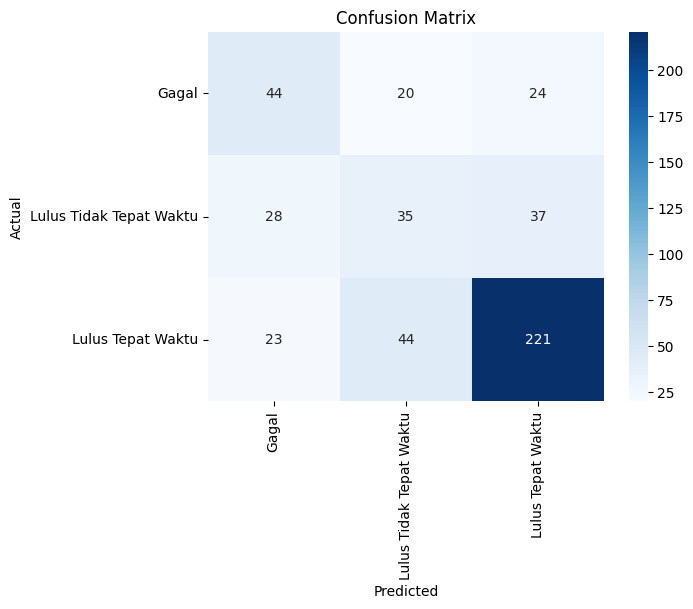

In [ ]:
# 1)	Evaluasi dengan data testing
# Predict probabilities for the test set
y_probs = logit_fit.predict(X_test)
y_train_probs=logit_fit.predict(X_train_smote)

# Convert probabilities to classes based on a threshold
#threshold = 0.5  # You can adjust this threshold based on your requirement
#y_pred = (y_probs > threshold).astype(int)
y_pred=np.rint(y_probs)
y_train_pred=np.rint(y_train_probs)

# Calculate confusion matrix
target_names = ['Gagal', 'Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [194]:
# 2)	Hitung dengan matrik pengukuran
# Classification report
target_names = ['Gagal', 'Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
reportlogit = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report:
                         precision    recall  f1-score   support

                  Gagal       0.46      0.50      0.48        88
Lulus Tidak Tepat Waktu       0.35      0.35      0.35       100
      Lulus Tepat Waktu       0.78      0.77      0.78       288

               accuracy                           0.63       476
              macro avg       0.53      0.54      0.54       476
           weighted avg       0.63      0.63      0.63       476



### Logistic Regression Hyperparameter

Text(0.5, 1.0, 'Confusion Matrix')

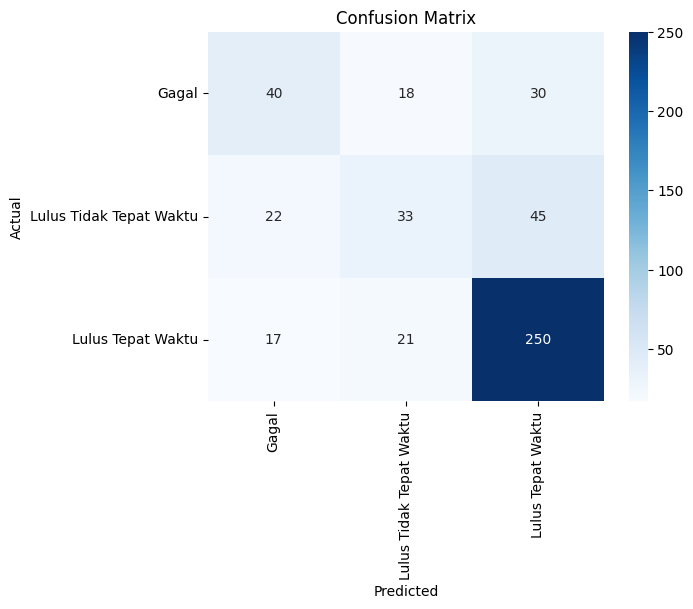

In [ ]:
# 1)	Evaluasi dengan data testing
# Predict probabilities for the test set
y_probs = logit_gs_fit.predict(X_test)
y_train_probs=logit_gs_fit.predict(X_train_smote)

# Convert probabilities to classes based on a threshold
#threshold = 0.5  # You can adjust this threshold based on your requirement
#y_pred = (y_probs > threshold).astype(int)
y_pred=np.rint(y_probs)
y_train_pred=np.rint(y_train_probs)

# Calculate confusion matrix
target_names = ['Gagal', 'Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [191]:
# 2)	Hitung dengan matrik pengukuran
# Classification report
target_names = ['Gagal', 'Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
reportlogitgs = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report:
                         precision    recall  f1-score   support

                  Gagal       0.51      0.45      0.48        88
Lulus Tidak Tepat Waktu       0.46      0.33      0.38       100
      Lulus Tepat Waktu       0.77      0.87      0.82       288

               accuracy                           0.68       476
              macro avg       0.58      0.55      0.56       476
           weighted avg       0.66      0.68      0.66       476



### Random Forest

Text(0.5, 1.0, 'Confusion Matrix')

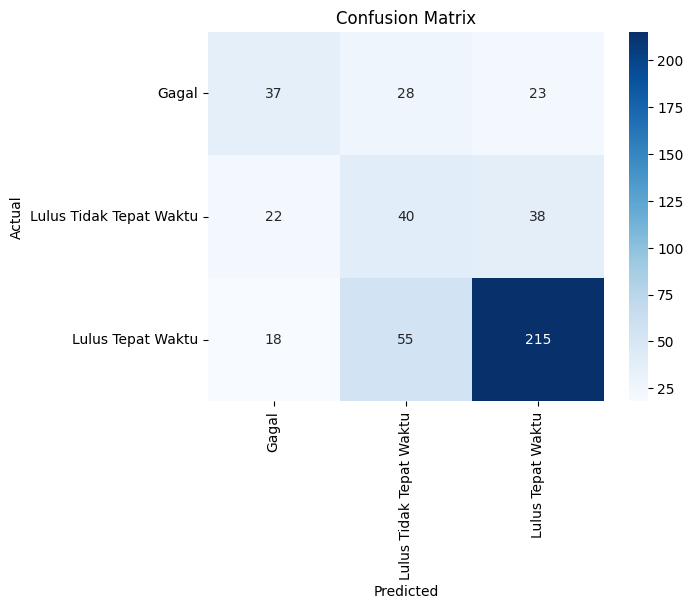

In [212]:
# Predict probabilities for the test set
y_probs = random_forest_fit.predict(X_test)
y_train_probs = random_forest_fit.predict(X_train_smote)
# Convert probabilities to classes based on a threshold
#threshold = 0.5  # You can adjust this threshold based on your requirement
#y_pred = (y_probs > threshold).astype(int)
y_pred=np.rint(y_probs)
y_train_pred=np.rint(y_train_probs)

# Calculate confusion matrix
target_names = ['Gagal', 'Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [213]:
# 2)	Hitung dengan matrik pengukuran
# Classification report
target_names = ['Gagal', 'Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
reportrf = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report:
                         precision    recall  f1-score   support

                  Gagal       0.48      0.42      0.45        88
Lulus Tidak Tepat Waktu       0.33      0.40      0.36       100
      Lulus Tepat Waktu       0.78      0.75      0.76       288

               accuracy                           0.61       476
              macro avg       0.53      0.52      0.52       476
           weighted avg       0.63      0.61      0.62       476



### Random Forest Hyperparameter

Text(0.5, 1.0, 'Confusion Matrix')

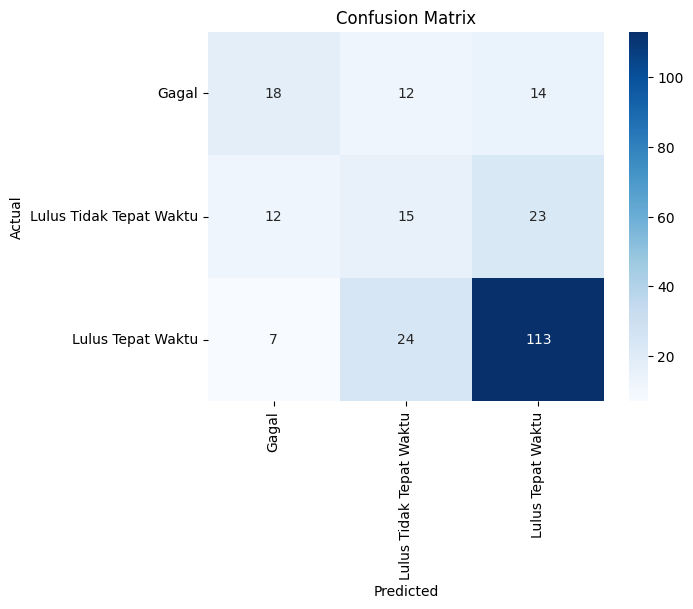

In [245]:
# Predict probabilities for the test set
y_probs = rf_gs_fit.predict(X_test)
y_train_probs = rf_gs_fit.predict(X_train_smote)
# Convert probabilities to classes based on a threshold
#threshold = 0.5  # You can adjust this threshold based on your requirement
#y_pred = (y_probs > threshold).astype(int)
y_pred=np.rint(y_probs)
y_train_pred=np.rint(y_train_probs)

# Calculate confusion matrix
target_names = ['Gagal', 'Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [246]:
# 2)	Hitung dengan matrik pengukuran
# Classification report
target_names = ['Gagal', 'Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
reportrfgs = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report:
                         precision    recall  f1-score   support

                  Gagal       0.49      0.41      0.44        44
Lulus Tidak Tepat Waktu       0.29      0.30      0.30        50
      Lulus Tepat Waktu       0.75      0.78      0.77       144

               accuracy                           0.61       238
              macro avg       0.51      0.50      0.50       238
           weighted avg       0.61      0.61      0.61       238



### Neural Network

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


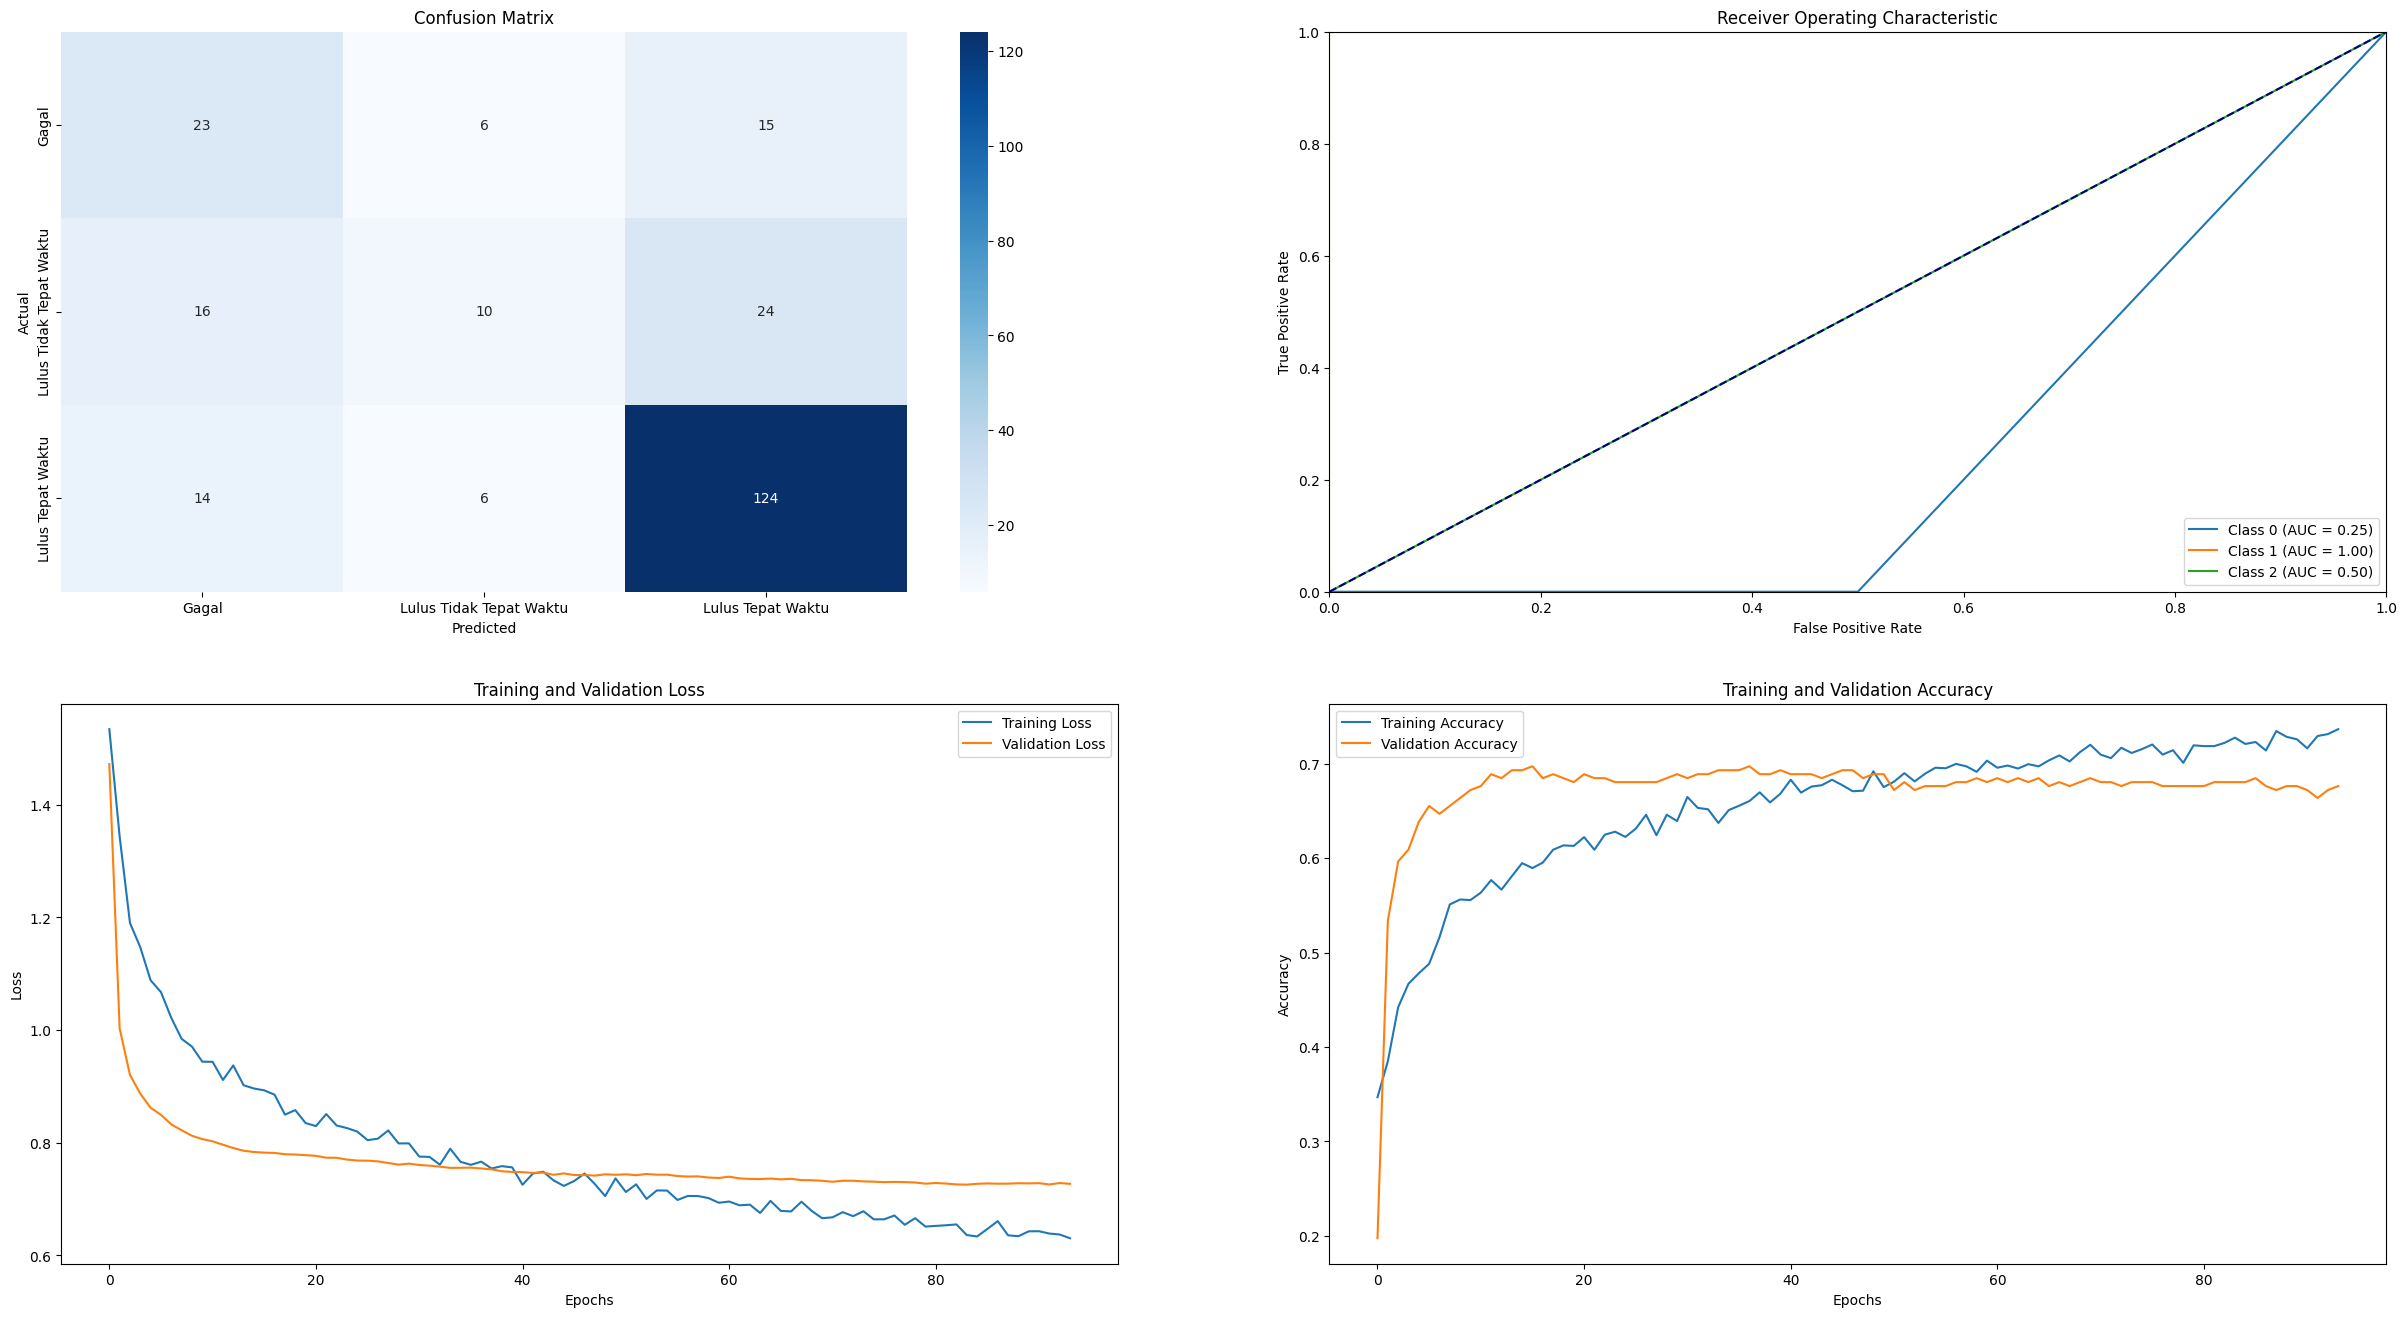

<Figure size 800x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [285]:
from keras.utils import to_categorical
# Predict probabilities for the test set
y_probs = modelann.predict(X_test)

# Convert probabilities to classes based on a threshold
threshold = 0.5  # You can adjust this threshold based on your requirement
y_pred = (y_probs > threshold).astype(int)
y_pred_classes = np.argmax(y_pred, axis=1)

y_testa=to_categorical(y_test)
# Visualize confusion matrix
fig, axs= plt.subplots(2,2, figsize=(30,16))

# Calculate confusion matrix
target_names = ['Gagal', 'Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names, ax=axs[0,0])
axs[0,0].set_xlabel('Predicted')
axs[0,0].set_ylabel('Actual')
axs[0,0].set_title('Confusion Matrix')

# Visualize ROC AUC
# Visualize ROC AUC
# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(y_pred[0])):
    fpr[i], tpr[i], _ = roc_curve(y_testa[i], y_pred[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(y_pred[0])):
    axs[0,1].plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

axs[0,1].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[0,1].set_xlim([0.0, 1.0])
axs[0,1].set_ylim([0.0, 1.0])
axs[0,1].set_xlabel('False Positive Rate')
axs[0,1].set_ylabel('True Positive Rate')
axs[0,1].set_title('Receiver Operating Characteristic')
axs[0,1].legend(loc="lower right")

# Visualize training history - Loss
axs[1,0].plot(ann_fit.history['loss'], label='Training Loss')
axs[1,0].plot(ann_fit.history['val_loss'], label='Validation Loss')
axs[1,0].set_xlabel('Epochs')
axs[1,0].set_ylabel('Loss')
axs[1,0].set_title('Training and Validation Loss')
axs[1,0].legend()

# Visualize training history - Accuracy
plt.figure(figsize=(12, 8))
axs[1,1].plot(ann_fit.history['accuracy'], label='Training Accuracy')
axs[1,1].plot(ann_fit.history['val_accuracy'], label='Validation Accuracy')
axs[1,1].set_xlabel('Epochs')
axs[1,1].set_ylabel('Accuracy')
axs[1,1].set_title('Training and Validation Accuracy')
axs[1,1].legend()

plt.show()

In [286]:
# 2)	Hitung dengan matrik pengukuran
# Classification report
target_names = ['Gagal', 'Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
reportann = classification_report(y_test, y_pred_classes, target_names=target_names, output_dict=True)
print('Classification Report:')
print(classification_report(y_test, y_pred_classes, target_names=target_names))

Classification Report:
                         precision    recall  f1-score   support

                  Gagal       0.43      0.52      0.47        44
Lulus Tidak Tepat Waktu       0.45      0.20      0.28        50
      Lulus Tepat Waktu       0.76      0.86      0.81       144

               accuracy                           0.66       238
              macro avg       0.55      0.53      0.52       238
           weighted avg       0.64      0.66      0.63       238



## DF REDUCED

### Logistic Regression Basic

Text(0.5, 1.0, 'Confusion Matrix')

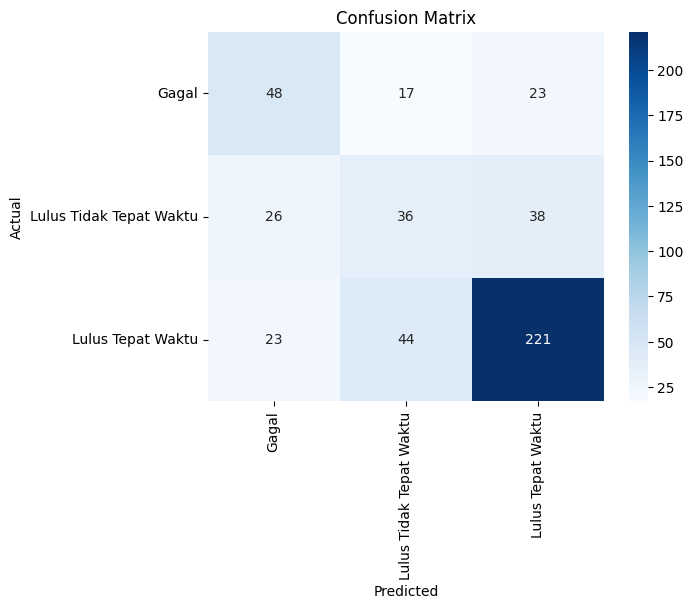

In [259]:
# 1)	Evaluasi dengan data testing
# Predict probabilities for the test set
y_probs = logit_fit_reduced.predict(X_test_reduced)
y_train_probs=logit_fit_reduced.predict(X_train_reduced_smote)

# Convert probabilities to classes based on a threshold
#threshold = 0.5  # You can adjust this threshold based on your requirement
#y_pred = (y_probs > threshold).astype(int)
y_pred=np.rint(y_probs)
y_train_pred=np.rint(y_train_probs)

# Calculate confusion matrix
target_names = ['Gagal', 'Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
cm = confusion_matrix(y_test_reduced, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [260]:
# 2)	Hitung dengan matrik pengukuran
# Classification report
target_names = ['Gagal', 'Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
reportlogit_reduced = classification_report(y_test_reduced, y_pred, target_names=target_names, output_dict=True)
print('Classification Report:')
print(classification_report(y_test_reduced, y_pred, target_names=target_names))

Classification Report:
                         precision    recall  f1-score   support

                  Gagal       0.49      0.55      0.52        88
Lulus Tidak Tepat Waktu       0.37      0.36      0.37       100
      Lulus Tepat Waktu       0.78      0.77      0.78       288

               accuracy                           0.64       476
              macro avg       0.55      0.56      0.55       476
           weighted avg       0.64      0.64      0.64       476



### Logistic Regression Hyperparameter

Text(0.5, 1.0, 'Confusion Matrix')

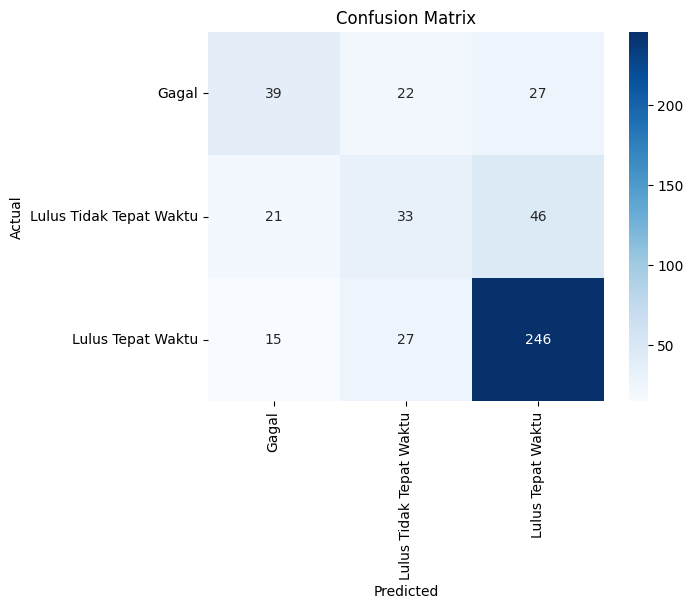

In [264]:
# 1)	Evaluasi dengan data testing
# Predict probabilities for the test set
y_probs = logit_gs_fit_reduced.predict(X_test_reduced)
y_train_probs=logit_gs_fit_reduced.predict(X_train_reduced_smote)

# Convert probabilities to classes based on a threshold
#threshold = 0.5  # You can adjust this threshold based on your requirement
#y_pred = (y_probs > threshold).astype(int)
y_pred=np.rint(y_probs)
y_train_pred=np.rint(y_train_probs)

# Calculate confusion matrix
target_names = ['Gagal', 'Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
cm = confusion_matrix(y_test_reduced, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [265]:
# 2)	Hitung dengan matrik pengukuran
# Classification report
target_names = ['Gagal', 'Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
reportlogitgs_reduced = classification_report(y_test_reduced, y_pred, target_names=target_names, output_dict=True)
print('Classification Report:')
print(classification_report(y_test_reduced, y_pred, target_names=target_names))

Classification Report:
                         precision    recall  f1-score   support

                  Gagal       0.52      0.44      0.48        88
Lulus Tidak Tepat Waktu       0.40      0.33      0.36       100
      Lulus Tepat Waktu       0.77      0.85      0.81       288

               accuracy                           0.67       476
              macro avg       0.56      0.54      0.55       476
           weighted avg       0.65      0.67      0.66       476



### Random Forest

Text(0.5, 1.0, 'Confusion Matrix')

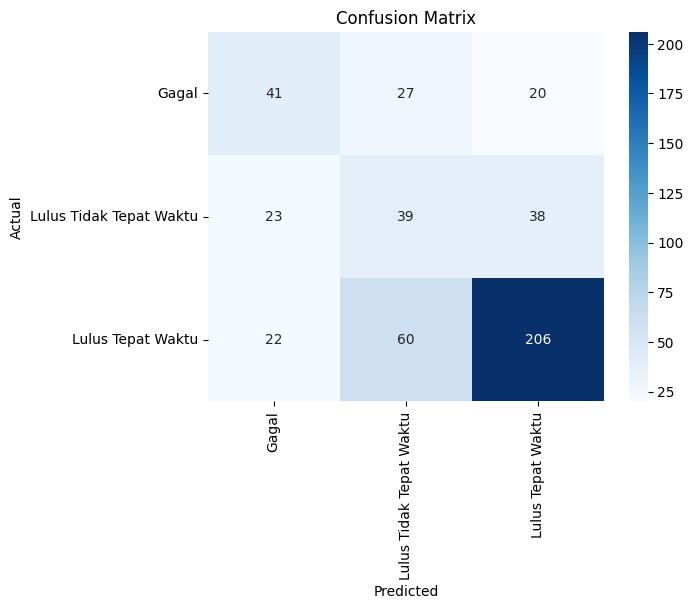

In [272]:
# Predict probabilities for the test set
y_probs = random_forest_fit_reduced.predict(X_test_reduced)
y_train_probs = random_forest_fit_reduced.predict(X_train_reduced_smote)
# Convert probabilities to classes based on a threshold
#threshold = 0.5  # You can adjust this threshold based on your requirement
#y_pred = (y_probs > threshold).astype(int)
y_pred=np.rint(y_probs)
y_train_pred=np.rint(y_train_probs)

# Calculate confusion matrix
target_names = ['Gagal', 'Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
cm = confusion_matrix(y_test_reduced, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [273]:
# 2)	Hitung dengan matrik pengukuran
# Classification report
target_names = ['Gagal', 'Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
reportrf_reduced = classification_report(y_test_reduced, y_pred, target_names=target_names, output_dict=True)
print('Classification Report:')
print(classification_report(y_test_reduced, y_pred, target_names=target_names))

Classification Report:
                         precision    recall  f1-score   support

                  Gagal       0.48      0.47      0.47        88
Lulus Tidak Tepat Waktu       0.31      0.39      0.35       100
      Lulus Tepat Waktu       0.78      0.72      0.75       288

               accuracy                           0.60       476
              macro avg       0.52      0.52      0.52       476
           weighted avg       0.63      0.60      0.61       476



### Random Forest Hyperparameter

Text(0.5, 1.0, 'Confusion Matrix')

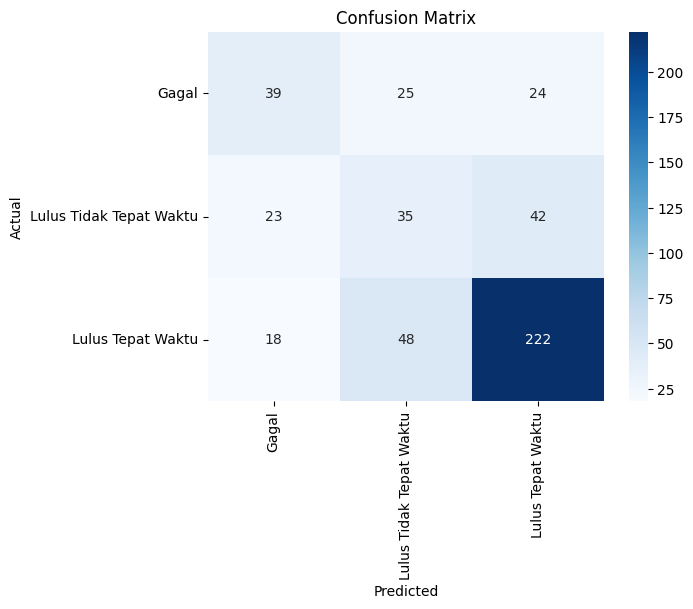

In [275]:
# Predict probabilities for the test set
y_probs = rf_gs_fit_reduced.predict(X_test_reduced)
y_train_probs = rf_gs_fit_reduced.predict(X_train_reduced_smote)
# Convert probabilities to classes based on a threshold
#threshold = 0.5  # You can adjust this threshold based on your requirement
#y_pred = (y_probs > threshold).astype(int)
y_pred=np.rint(y_probs)
y_train_pred=np.rint(y_train_probs)

# Calculate confusion matrix
target_names = ['Gagal', 'Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
cm = confusion_matrix(y_test_reduced, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [276]:
# 2)	Hitung dengan matrik pengukuran
# Classification report
target_names = ['Gagal', 'Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
reportrfgs_reduced = classification_report(y_test_reduced, y_pred, target_names=target_names, output_dict=True)
print('Classification Report:')
print(classification_report(y_test_reduced, y_pred, target_names=target_names))

Classification Report:
                         precision    recall  f1-score   support

                  Gagal       0.49      0.44      0.46        88
Lulus Tidak Tepat Waktu       0.32      0.35      0.34       100
      Lulus Tepat Waktu       0.77      0.77      0.77       288

               accuracy                           0.62       476
              macro avg       0.53      0.52      0.52       476
           weighted avg       0.62      0.62      0.62       476



### Neural Network

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


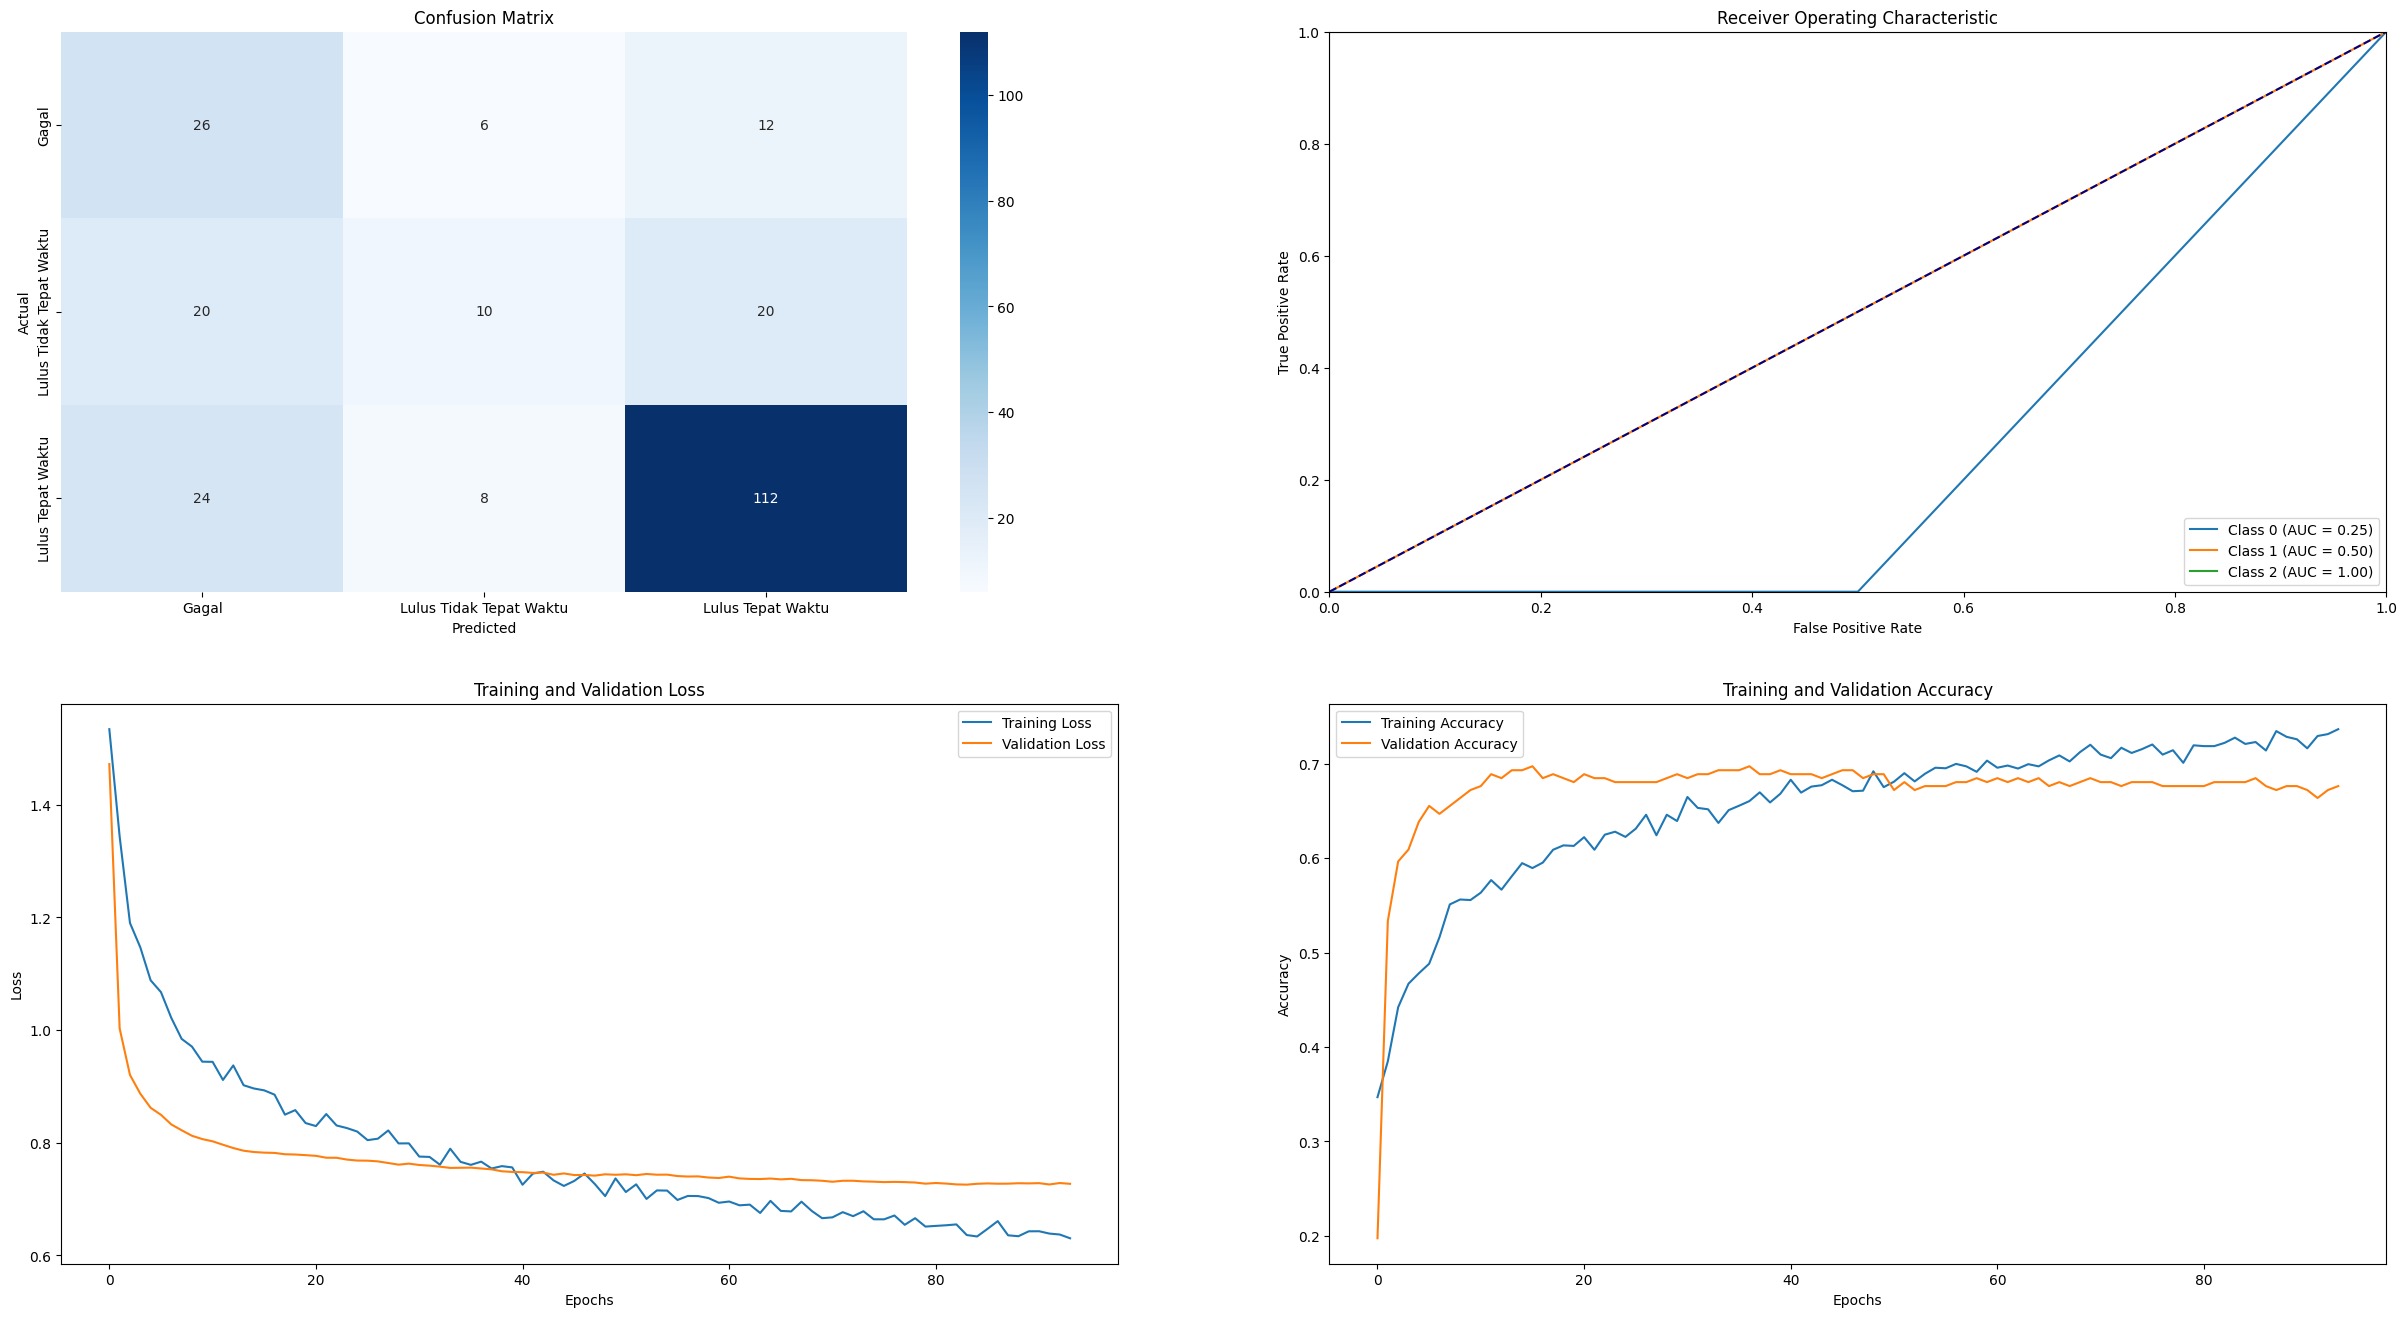

<Figure size 800x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [303]:
from keras.utils import to_categorical
# Predict probabilities for the test set
y_probs = modelann_reduced.predict(X_test_reduced)

# Convert probabilities to classes based on a threshold
#threshold = 0.4  # You can adjust this threshold based on your requirement
#y_pred = (y_probs > threshold).astype(int)
#y_pred_classes = np.argmax(y_pred, axis=1)
y_pred=np.rint(y_probs)
y_train_pred=np.rint(y_train_probs)
y_pred_classes = np.argmax(y_pred, axis=1)

y_testa=to_categorical(y_test_reduced)
# Visualize confusion matrix
fig, axs= plt.subplots(2,2, figsize=(30,16))

# Calculate confusion matrix
target_names = ['Gagal', 'Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
cm = confusion_matrix(y_test_reduced, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names, ax=axs[0,0])
axs[0,0].set_xlabel('Predicted')
axs[0,0].set_ylabel('Actual')
axs[0,0].set_title('Confusion Matrix')

# Visualize ROC AUC
# Visualize ROC AUC
# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(y_pred[0])):
    fpr[i], tpr[i], _ = roc_curve(y_testa[i], y_pred[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(y_pred[0])):
    axs[0,1].plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

axs[0,1].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[0,1].set_xlim([0.0, 1.0])
axs[0,1].set_ylim([0.0, 1.0])
axs[0,1].set_xlabel('False Positive Rate')
axs[0,1].set_ylabel('True Positive Rate')
axs[0,1].set_title('Receiver Operating Characteristic')
axs[0,1].legend(loc="lower right")

# Visualize training history - Loss
axs[1,0].plot(ann_fit.history['loss'], label='Training Loss')
axs[1,0].plot(ann_fit.history['val_loss'], label='Validation Loss')
axs[1,0].set_xlabel('Epochs')
axs[1,0].set_ylabel('Loss')
axs[1,0].set_title('Training and Validation Loss')
axs[1,0].legend()

# Visualize training history - Accuracy
plt.figure(figsize=(12, 8))
axs[1,1].plot(ann_fit.history['accuracy'], label='Training Accuracy')
axs[1,1].plot(ann_fit.history['val_accuracy'], label='Validation Accuracy')
axs[1,1].set_xlabel('Epochs')
axs[1,1].set_ylabel('Accuracy')
axs[1,1].set_title('Training and Validation Accuracy')
axs[1,1].legend()

plt.show()

In [304]:
# 2)	Hitung dengan matrik pengukuran
# Classification report
target_names = ['Gagal', 'Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
reportann_reduced = classification_report(y_test_reduced, y_pred_classes, target_names=target_names, output_dict=True)
print('Classification Report:')
print(classification_report(y_test_reduced, y_pred_classes, target_names=target_names))

Classification Report:
                         precision    recall  f1-score   support

                  Gagal       0.37      0.59      0.46        44
Lulus Tidak Tepat Waktu       0.42      0.20      0.27        50
      Lulus Tepat Waktu       0.78      0.78      0.78       144

               accuracy                           0.62       238
              macro avg       0.52      0.52      0.50       238
           weighted avg       0.63      0.62      0.61       238



# Task 10
Berdasarkan hasil evaluasi, kita bisa menyimpulkan bahwa

**$\color{orange}{\text{(Lakukan analisis hasil )}}$**

## DF FULL

In [287]:
accuracy_table=pd.DataFrame({
    'accuracy': [reportlogit['accuracy'],
                 reportlogitgs['accuracy'],
                 reportrf['accuracy'],
                 reportrfgs['accuracy'],
                 reportann['accuracy']
                 ],
    'precision':[
                 reportlogit['weighted avg']['precision'], 
                 reportlogitgs['weighted avg']['precision'],   
                 reportrf['weighted avg']['precision'],
                 reportrfgs['weighted avg']['precision'],
                 reportann['weighted avg']['precision']
    ],
    'recall':[
                 reportlogit['weighted avg']['recall'],
                 reportlogitgs['weighted avg']['recall'],
                 reportrf['weighted avg']['recall'],
                 reportrfgs['weighted avg']['recall'],
                 reportann['weighted avg']['recall']

    ],
    'f1-score':[
                 reportlogit['weighted avg']['f1-score'], 
                 reportlogitgs['weighted avg']['f1-score'], 
                 reportrf['weighted avg']['f1-score'],
                 reportrfgs['weighted avg']['f1-score'],
                 reportann['weighted avg']['f1-score']
                 
    ]
    }, index=['logistic regression', 'tuned logistic regression', 'random forest', 'tuned random forest', 'artificial neural network'])


accuracy_table=accuracy_table.astype(float)
accuracy_table.map('{:.2%}'.format)

accuracy precision  recall f1-score
logistic regression         63.03%    63.41%  63.03%   63.20%
tuned logistic regression   67.86%    65.53%  67.86%   66.27%
random forest               61.34%    62.85%  61.34%   61.96%
tuned random forest         61.34%    60.75%  61.34%   60.97%
artificial neural network   65.97%    63.60%  65.97%   63.48%

## DF REDUCED

In [305]:
accuracy_table=pd.DataFrame({
    'accuracy': [reportlogit_reduced['accuracy'],
                 reportlogitgs_reduced['accuracy'],
                 reportrf_reduced['accuracy'],
                 reportrfgs_reduced['accuracy'],
                 reportann_reduced['accuracy']
                 ],
    'precision':[
                 reportlogit_reduced['weighted avg']['precision'], 
                 reportlogitgs_reduced['weighted avg']['precision'],   
                 reportrf_reduced['weighted avg']['precision'],
                 reportrfgs_reduced['weighted avg']['precision'],
                 reportann_reduced['weighted avg']['precision']
    ],
    'recall':[
                 reportlogit_reduced['weighted avg']['recall'],
                 reportlogitgs_reduced['weighted avg']['recall'],
                 reportrf_reduced['weighted avg']['recall'],
                 reportrfgs_reduced['weighted avg']['recall'],
                 reportann_reduced['weighted avg']['recall']

    ],
    'f1-score':[
                 reportlogit_reduced['weighted avg']['f1-score'], 
                 reportlogitgs_reduced['weighted avg']['f1-score'], 
                 reportrf_reduced['weighted avg']['f1-score'],
                 reportrfgs_reduced['weighted avg']['f1-score'],
                 reportann_reduced['weighted avg']['f1-score']
                 
    ]
    }, index=['logistic regression', 'tuned logistic regression', 'random forest', 'tuned random forest', 'artificial neural network'])


accuracy_table=accuracy_table.astype(float)
accuracy_table.map('{:.2%}'.format)

accuracy precision  recall f1-score
logistic regression         64.08%    64.36%  64.08%   64.19%
tuned logistic regression   66.81%    64.73%  66.81%   65.51%
random forest               60.08%    62.53%  60.08%   61.12%
tuned random forest         62.18%    62.46%  62.18%   62.29%
artificial neural network   62.18%    62.68%  62.18%   61.17%

In [306]:
def summarize_best(acc_tbl, title):
    acc_tbl = acc_tbl.astype(float)
    display(acc_tbl.style.format('{:.2%}').set_caption(title))
    print('Best by accuracy :', acc_tbl['accuracy'].idxmax(),
          f"({acc_tbl['accuracy'].max():.4f})")
    print('Best by f1-score :', acc_tbl['f1-score'].idxmax(),
          f"({acc_tbl['f1-score'].max():.4f})")
    # Jika ada baris "logistic regression" dan "tuned logistic regression"
    if {'logistic regression','tuned logistic regression'}.issubset(acc_tbl.index):
        delta_acc = acc_tbl.loc['tuned logistic regression','accuracy'] - acc_tbl.loc['logistic regression','accuracy']
        delta_f1  = acc_tbl.loc['tuned logistic regression','f1-score'] - acc_tbl.loc['logistic regression','f1-score']
        print(f'Δ tuned vs basic -> accuracy: {delta_acc:.4f}, f1: {delta_f1:.4f}')

# Panggil untuk DF FULL
acc_full = pd.DataFrame({
    'accuracy': [reportlogit['accuracy'], reportlogitgs['accuracy'], reportrf['accuracy'], reportrfgs['accuracy'], reportann['accuracy']],
    'precision':[reportlogit['weighted avg']['precision'], reportlogitgs['weighted avg']['precision'], reportrf['weighted avg']['precision'], reportrfgs['weighted avg']['precision'], reportann['weighted avg']['precision']],
    'recall':[reportlogit['weighted avg']['recall'], reportlogitgs['weighted avg']['recall'], reportrf['weighted avg']['recall'], reportrfgs['weighted avg']['recall'], reportann['weighted avg']['recall']],
    'f1-score':[reportlogit['weighted avg']['f1-score'], reportlogitgs['weighted avg']['f1-score'], reportrf['weighted avg']['f1-score'], reportrfgs['weighted avg']['f1-score'], reportann['weighted avg']['f1-score']]
}, index=['logistic regression','tuned logistic regression','random forest','tuned random forest','artificial neural network'])
summarize_best(acc_full, 'DF FULL (Test Set)')

# Panggil untuk DF REDUCED
acc_reduced = pd.DataFrame({
    'accuracy': [reportlogit_reduced['accuracy'], reportlogitgs_reduced['accuracy'], reportrf_reduced['accuracy'], reportrfgs_reduced['accuracy'], reportann_reduced['accuracy']],
    'precision':[reportlogit_reduced['weighted avg']['precision'], reportlogitgs_reduced['weighted avg']['precision'], reportrf_reduced['weighted avg']['precision'], reportrfgs_reduced['weighted avg']['precision'], reportann_reduced['weighted avg']['precision']],
    'recall':[reportlogit_reduced['weighted avg']['recall'], reportlogitgs_reduced['weighted avg']['recall'], reportrf_reduced['weighted avg']['recall'], reportrfgs_reduced['weighted avg']['recall'], reportann_reduced['weighted avg']['recall']],
    'f1-score':[reportlogit_reduced['weighted avg']['f1-score'], reportlogitgs_reduced['weighted avg']['f1-score'], reportrf_reduced['weighted avg']['f1-score'], reportrfgs_reduced['weighted avg']['f1-score'], reportann_reduced['weighted avg']['f1-score']]
}, index=['logistic regression','tuned logistic regression','random forest','tuned random forest','artificial neural network'])
summarize_best(acc_reduced, 'DF REDUCED (Test Set)')

Best by accuracy : tuned logistic regression (0.6786)
Best by f1-score : tuned logistic regression (0.6627)
Δ tuned vs basic -> accuracy: 0.0483, f1: 0.0307


Best by accuracy : tuned logistic regression (0.6681)
Best by f1-score : tuned logistic regression (0.6551)
Δ tuned vs basic -> accuracy: 0.0273, f1: 0.0132


# Kesimpulan

Kesimpulan Per-Model (DF Full vs DF Reduced)

Secara umum perbedaan kinerja antara DF Full dan DF Reduced kecil: fitur yang dibuang (dengan p-value > 0.05 pada chi-square) tidak menurunkan akurasi/f1 secara berarti → valid bahwa fitur tersebut kurang informatif.

Model terbaik (mengacu pada baris dengan akurasi dan f1-weighted tertinggi di accuracy_table) adalah Logistic Regression setelah tuning (optimasi C, solver).

confusion matrix menunjukkan semua kelas terprediksi, meski kelas minoritas masih lebih sering keliru.
Penggunaan SMOTE meningkatkan keseimbangan kelas sehingga model tidak hanya bias ke kelas mayoritas.

Outlier removal dengan IQR 1.5 mengurangi ekstrem; perlu hati‑hati jika fitur yang terpangkas sebenarnya relevan secara prediktif.